In [1]:
#Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
from scipy.optimize import linprog
from scipy.optimize import minimize

In [3]:
#matplotlibでグラフを表示すると日本語が文字化けするためフォントを入れる
!pip install japanize-matplotlib
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 4.7 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=97b9ae94c652e4cd9117af2a39e112a546a77a916605b9636044418636a19982
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [4]:
# pandasを使ったファイル取り込み
file = '/content/drive/MyDrive/授業/2022データ解析講座(浜松)/ProgPrefecture2022/data/prefecture2022.csv'
df_prefecture = pd.read_csv(file)
df_prefecture

,precode,prename,hosprate,infecrate,deathrate,senior,crimerate,trafficaccident,maleage,malehealth,femaleage,femalehealth,japanese,math,aveincome,birthrate,checkup
0,1,北海道,9.465580,12.492249,2.262839,31.3,2.125933,2.74,80.28,71.60,86.77,75.03,64,68,308.8,1.24,44.2
1,2,青森県,13.170213,5.336834,0.590283,32.6,1.605008,2.25,78.67,71.73,85.93,76.05,69,71,258.8,1.38,49.6
2,3,岩手県,13.307692,2.993394,1.462069,32.5,1.527663,3.75,79.86,71.39,86.44,74.69,66,68,270.6,1.35,57.3
3,4,宮城県,16.681159,7.318419,0.700421,27.8,2.300174,1.91,80.99,72.90,87.16,75.10,64,68,316.6,1.23,61.2
4,5,秋田県,14.117647,2.229167,1.261682,36.4,1.777083,3.83,79.51,72.61,86.38,76.00,71,73,263.8,1.33,51.7
5,6,山形県,15.705882,3.634831,1.442555,32.9,2.143258,2.78,80.52,72.65,86.96,75.67,66,69,270.4,1.40,65.2
6,7,福島県,14.547619,5.463721,1.757364,30.9,2.368794,3.09,80.12,72.28,86.40,75.37,64,68,288.3,1.47,54.7
7,8,茨城県,16.572254,9.159051,0.837808,28.9,2.541332,2.94,80.28,72.71,86.33,75.80,65,70,331.7,1.39,55.4
8,9,栃木県,18.235849,8.898086,0.686047,28.0,2.433523,3.10,80.10,72.62,86.24,76.36,65,69,326.0,1.39,54.2
9,10,群馬県,14.915385,10.034554,0.935396,29.4,3.087674,2.32,80.61,73.41,86.84,75.80,65,69,319.9,1.40,54.9


In [5]:
df_prefecture.describe()

,precode,hosprate,infecrate,deathrate,senior,crimerate,trafficaccident,maleage,malehealth,femaleage,femalehealth,japanese,math,aveincome,birthrate,checkup
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,24.000000,14.266711,10.150873,0.945580,30.076596,2.283233,2.828936,80.652128,72.638085,87.022128,75.583191,65.106383,70.021277,308.178723,1.454894,54.570213
std,13.711309,5.188885,7.823926,0.414076,2.972498,0.400795,1.021091,0.576560,0.597235,0.404114,0.740755,2.159247,1.712986,31.704539,0.140633,4.674162
min,1.000000,5.580645,2.229167,0.204082,21.600000,1.339858,1.110000,78.670000,71.390000,85.930000,73.680000,61.000000,68.000000,258.800000,1.150000,44.200000
25%,12.500000,10.342172,5.400277,0.700947,28.850000,2.025021,2.045000,80.275000,72.280000,86.800000,75.030000,64.000000,69.000000,284.150000,1.380000,51.200000
50%,24.000000,13.693878,7.951957,0.855052,30.300000,2.283951,2.740000,80.690000,72.650000,87.100000,75.590000,65.000000,69.000000,309.000000,1.460000,54.500000
75%,35.500000,16.993782,11.894696,1.055565,32.000000,2.546223,3.335000,81.035000,73.080000,87.295000,76.070000,66.000000,71.000000,330.650000,1.545000,57.550000
max,47.000000,27.491071,46.098160,2.262839,36.400000,3.087674,6.170000,81.780000,73.720000,87.670000,77.580000,71.000000,74.000000,408.100000,1.820000,65.900000


<BarContainer object of 47 artists>

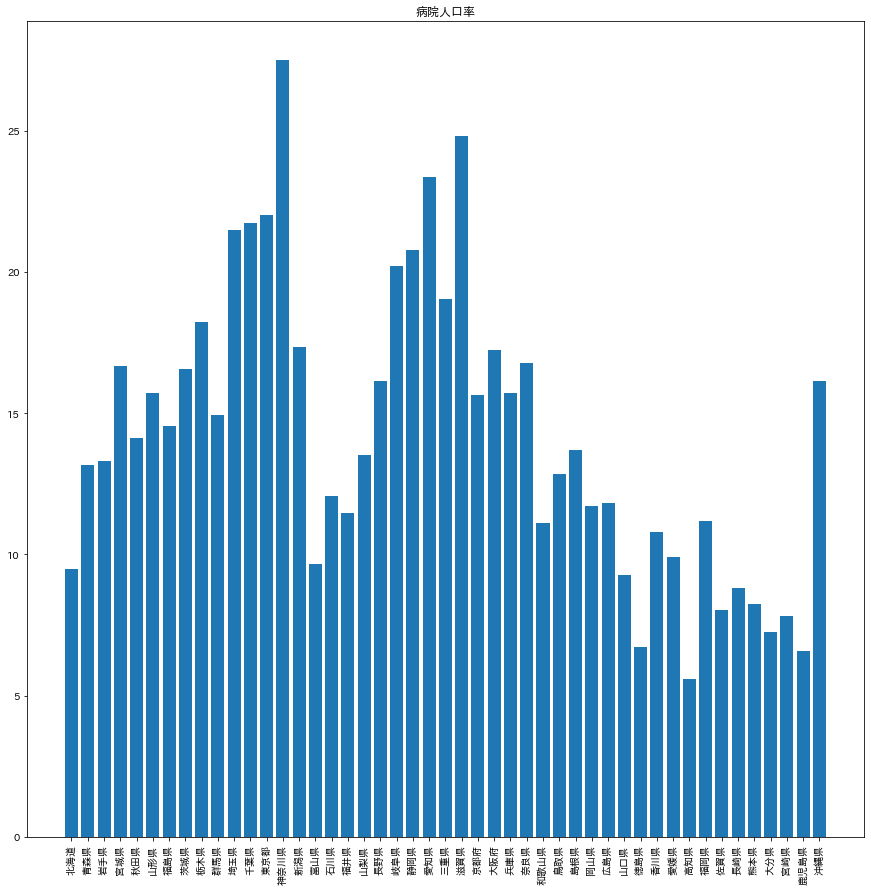

In [6]:
#x軸を都道府県、y軸を各要素で棒グラフを描く
x = df_prefecture['prename']
y = df_prefecture['hosprate']
plt.figure(figsize=(15, 15))
plt.title('病院人口率')
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.bar(x,y)

<BarContainer object of 47 artists>

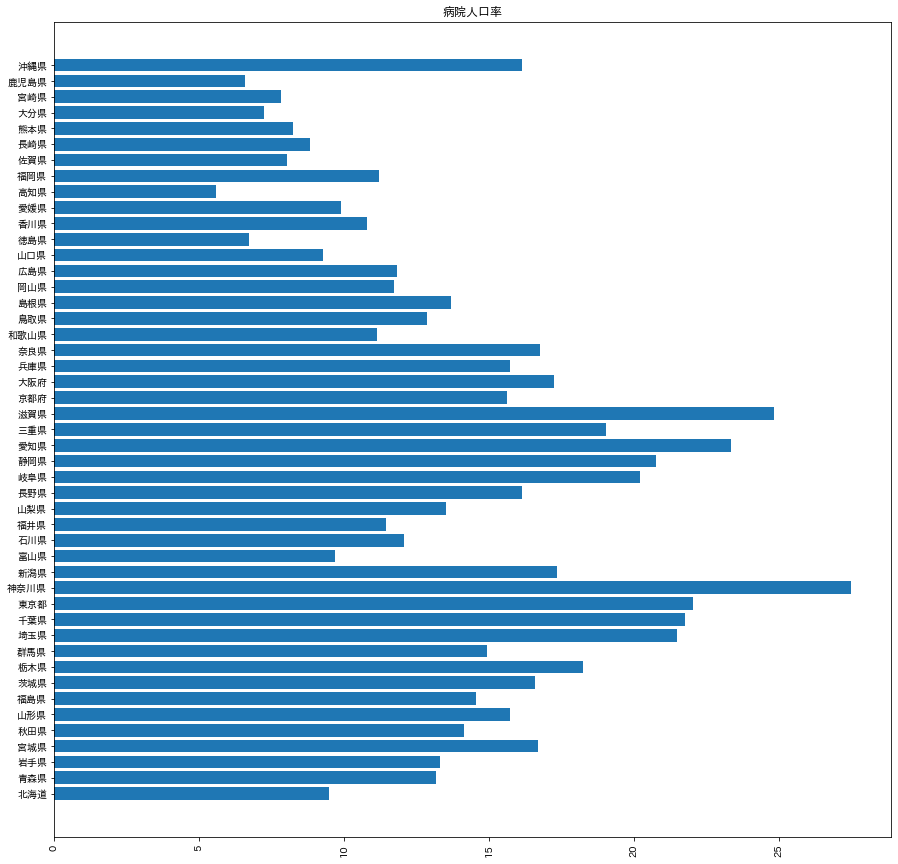

In [7]:
#x軸を都道府県、y軸を各要素で棒グラフを描く(縦方向)
x = df_prefecture['prename']
y = df_prefecture['hosprate']
plt.figure(figsize=(15, 15))
plt.title('病院人口率')
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.barh(x,y)

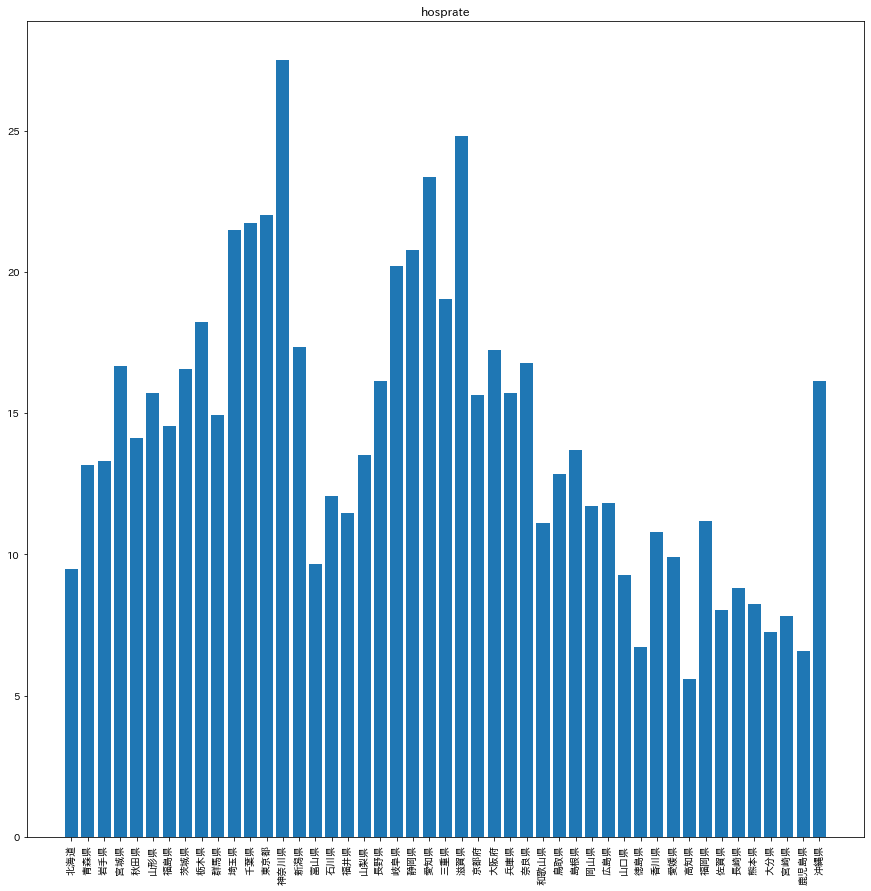

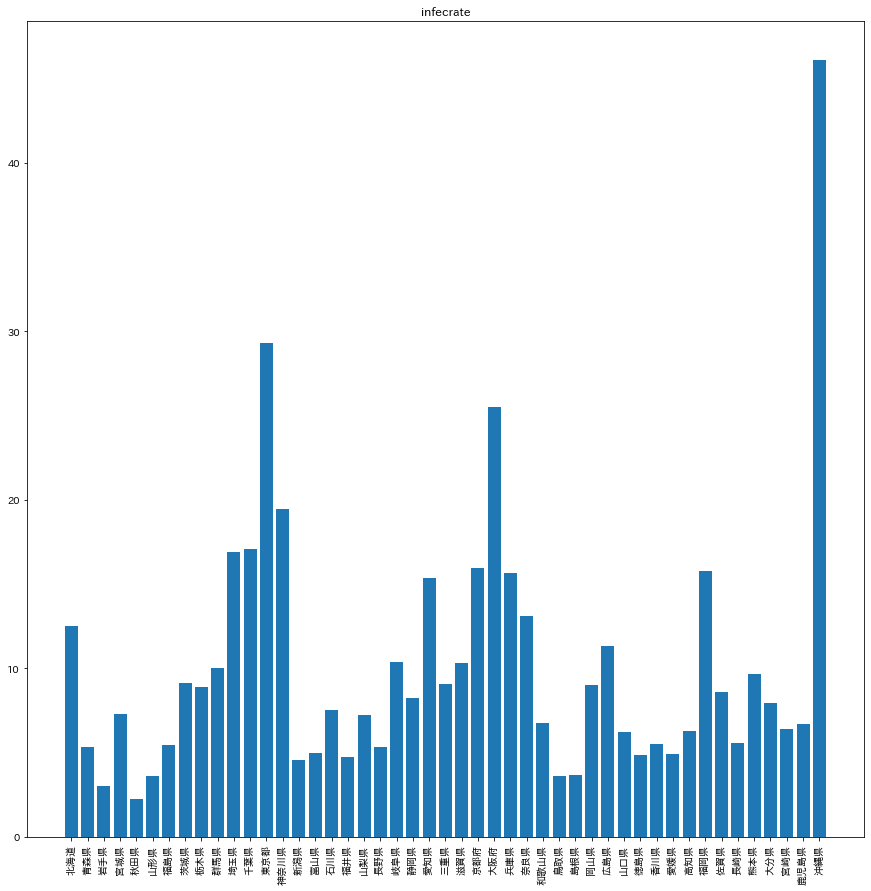

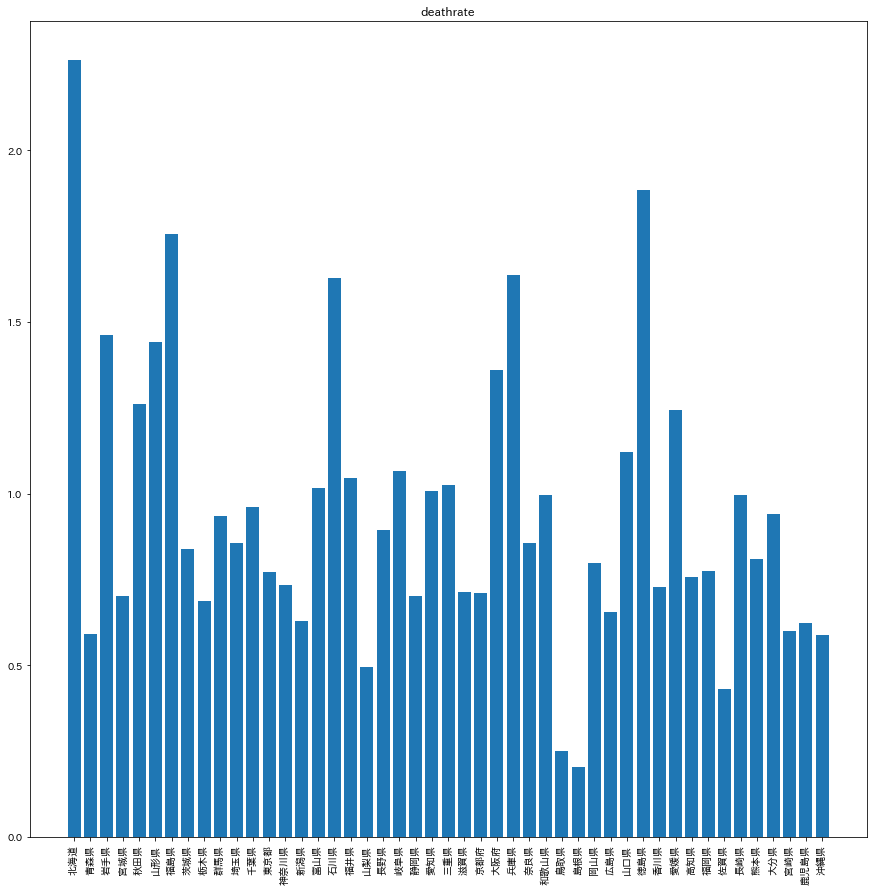

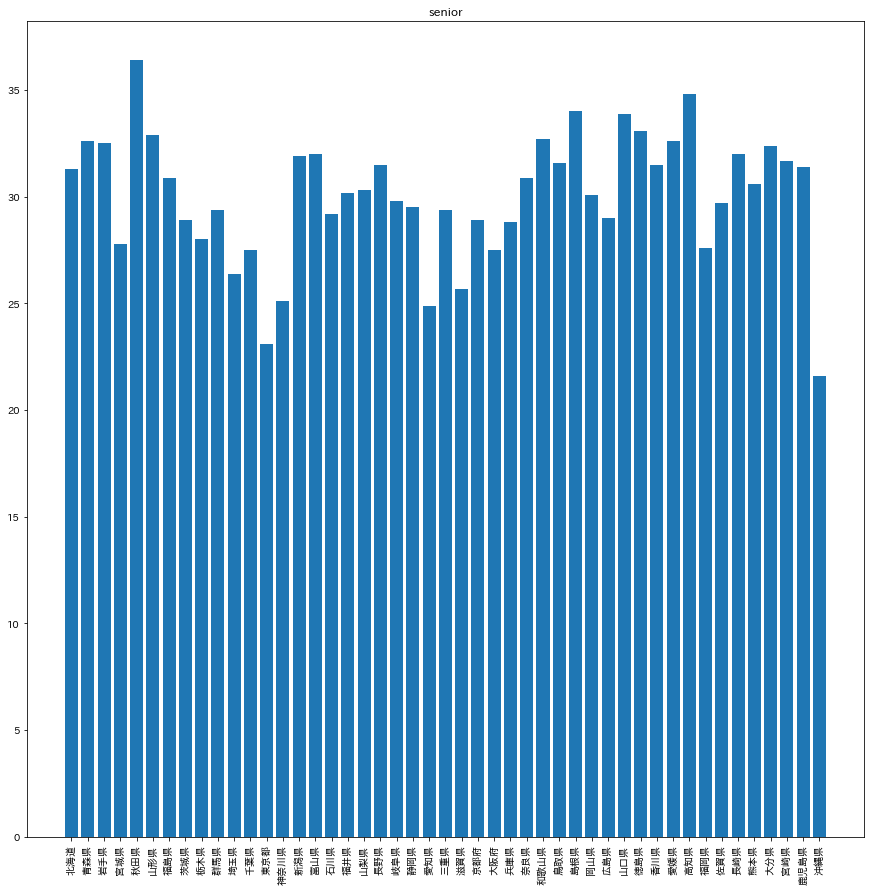

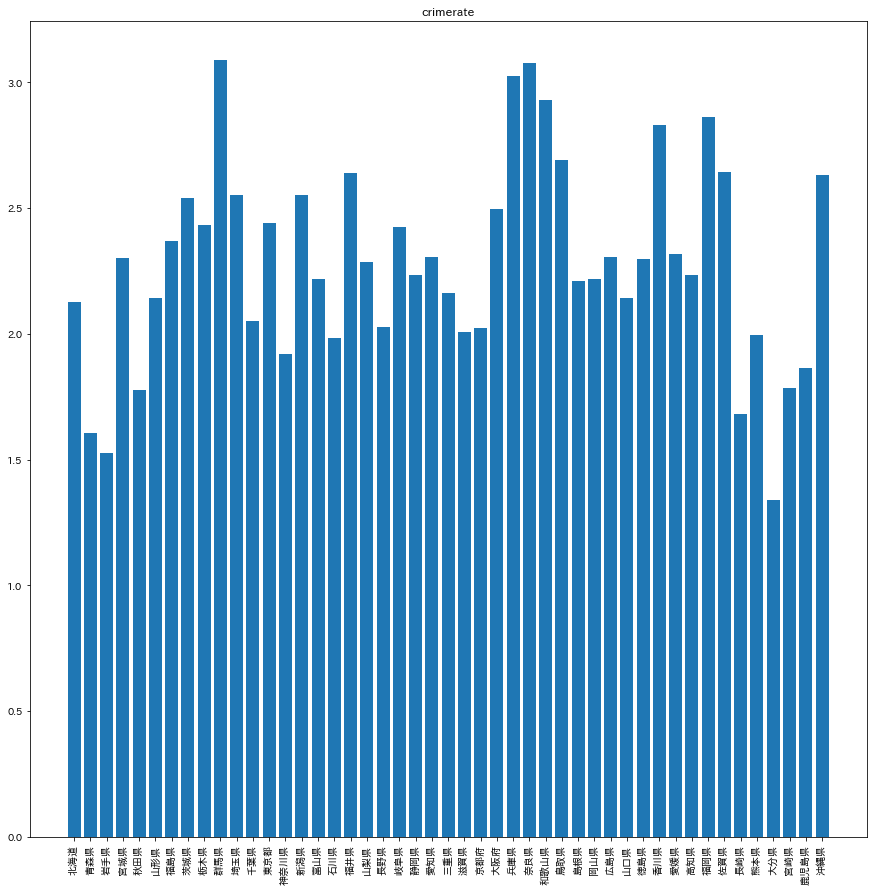

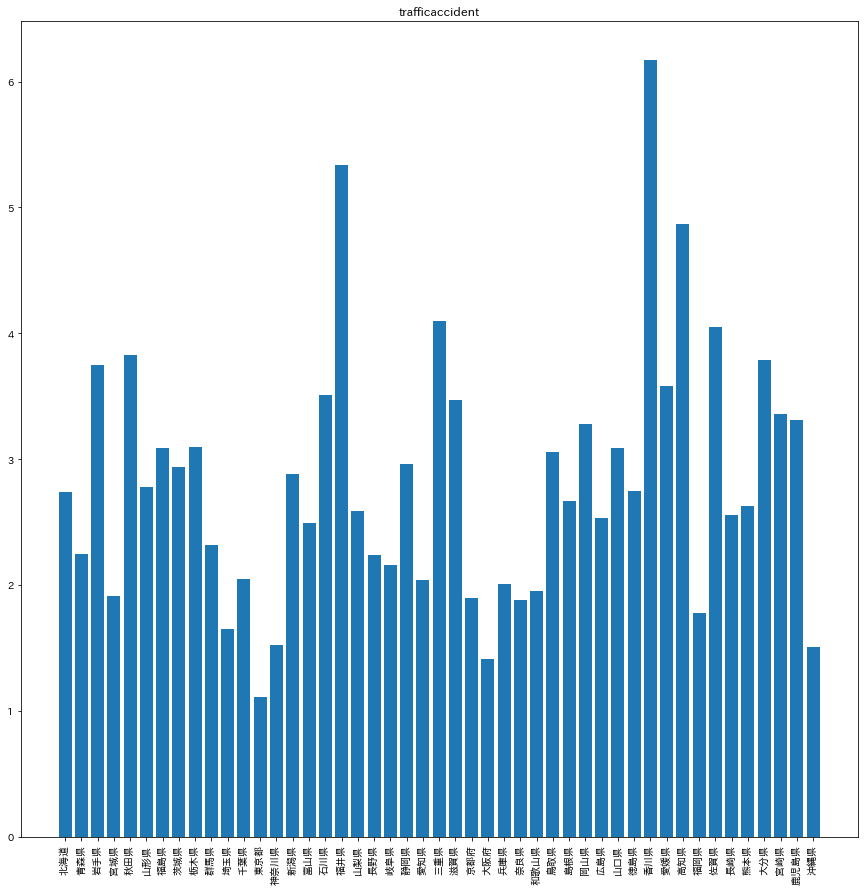

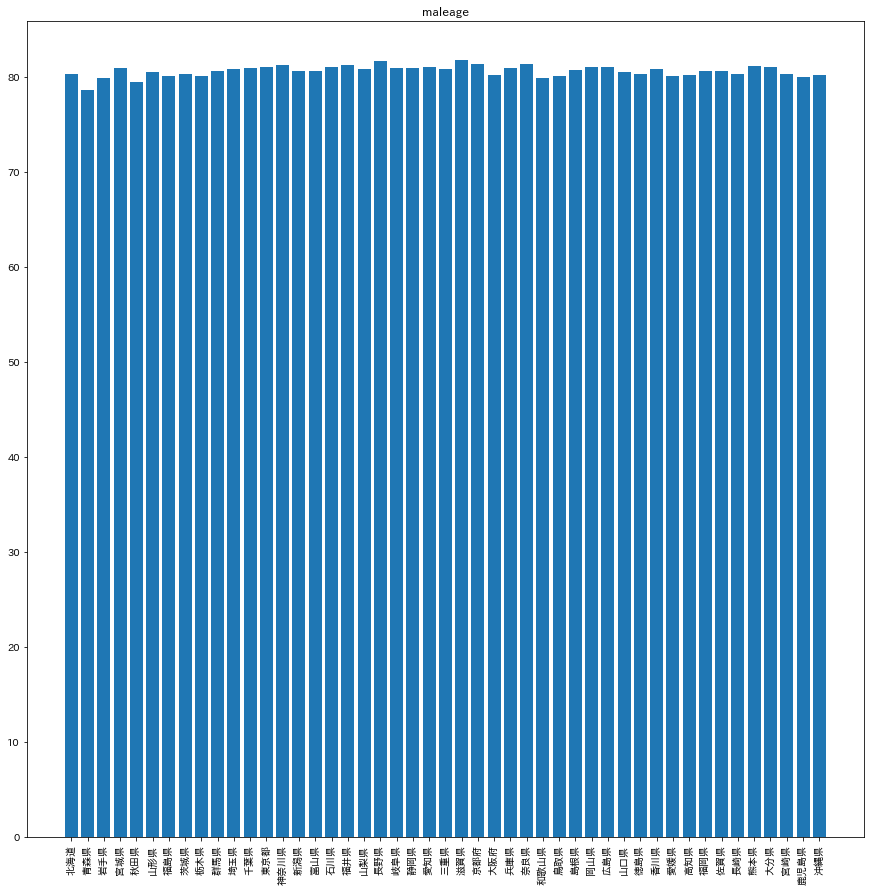

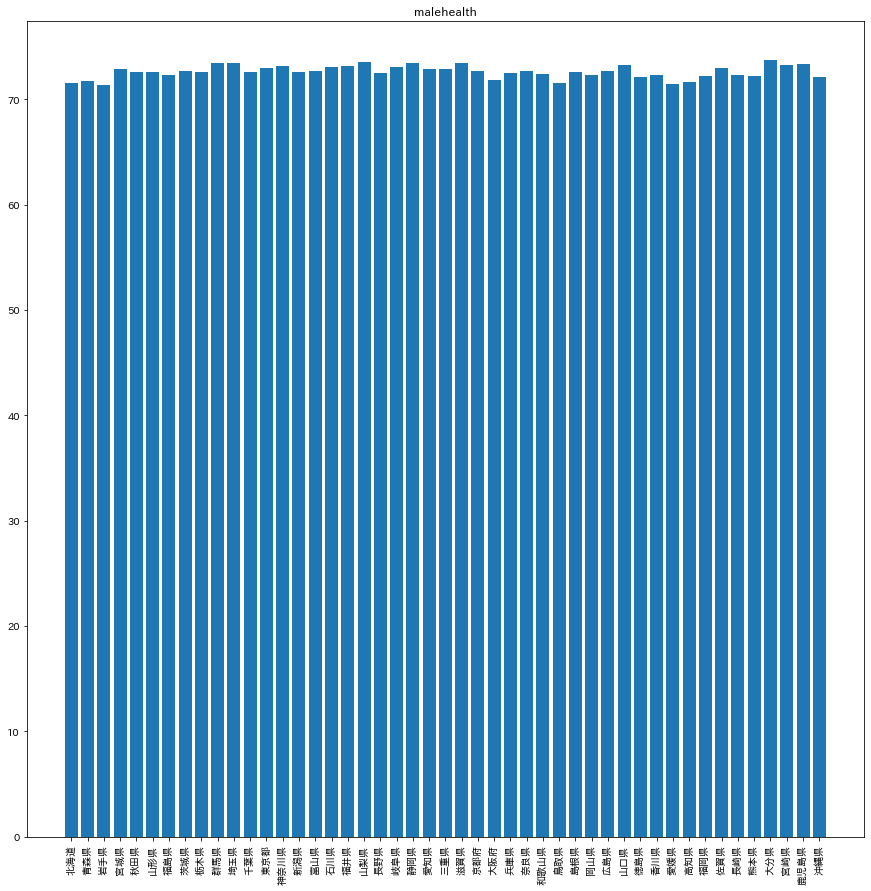

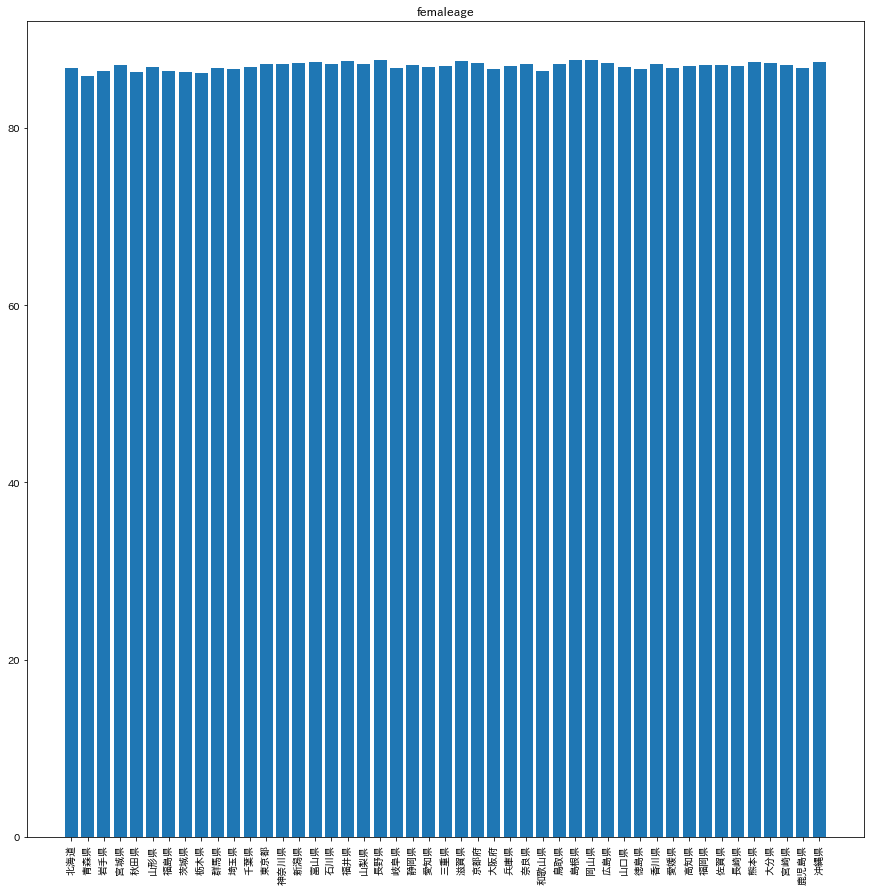

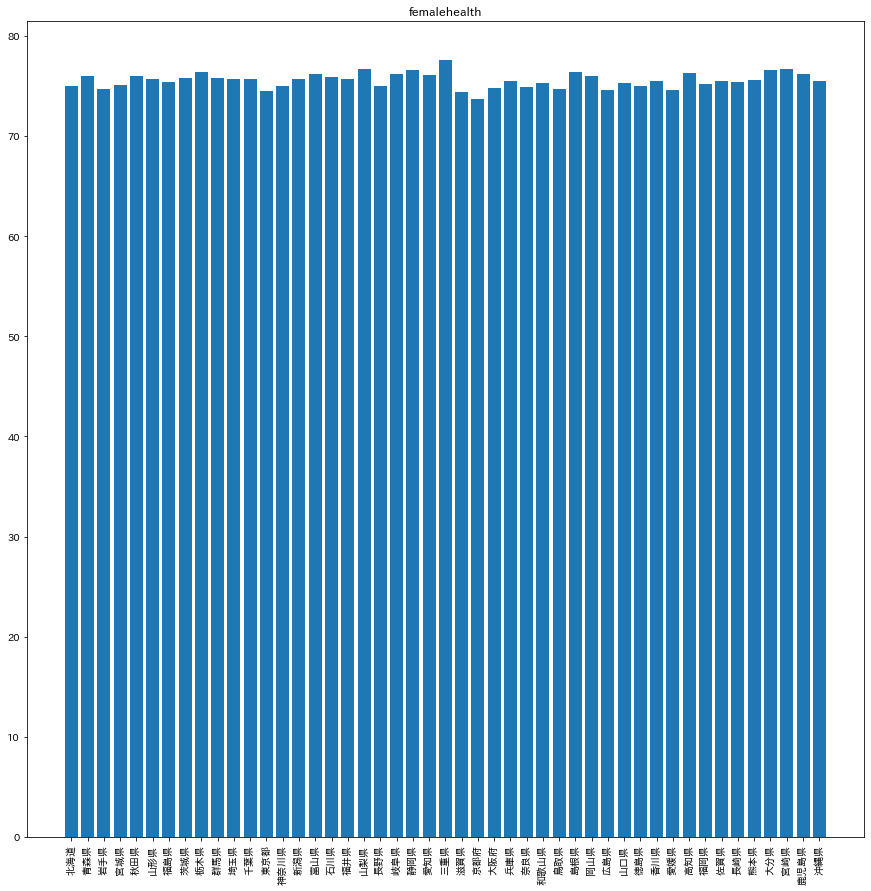

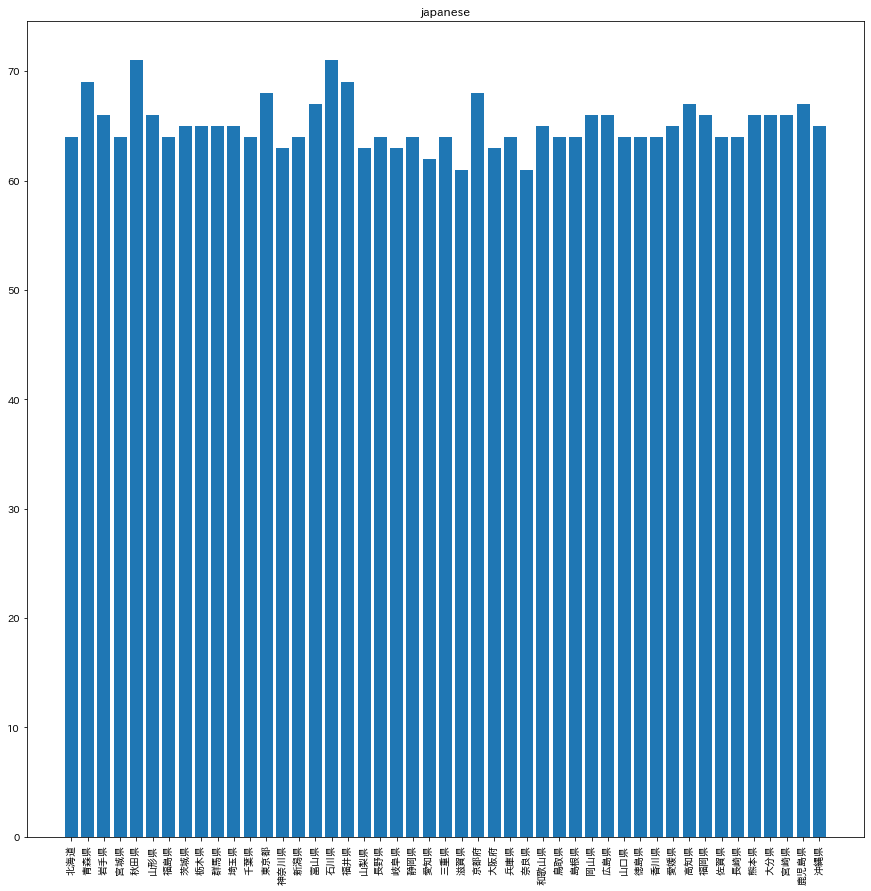

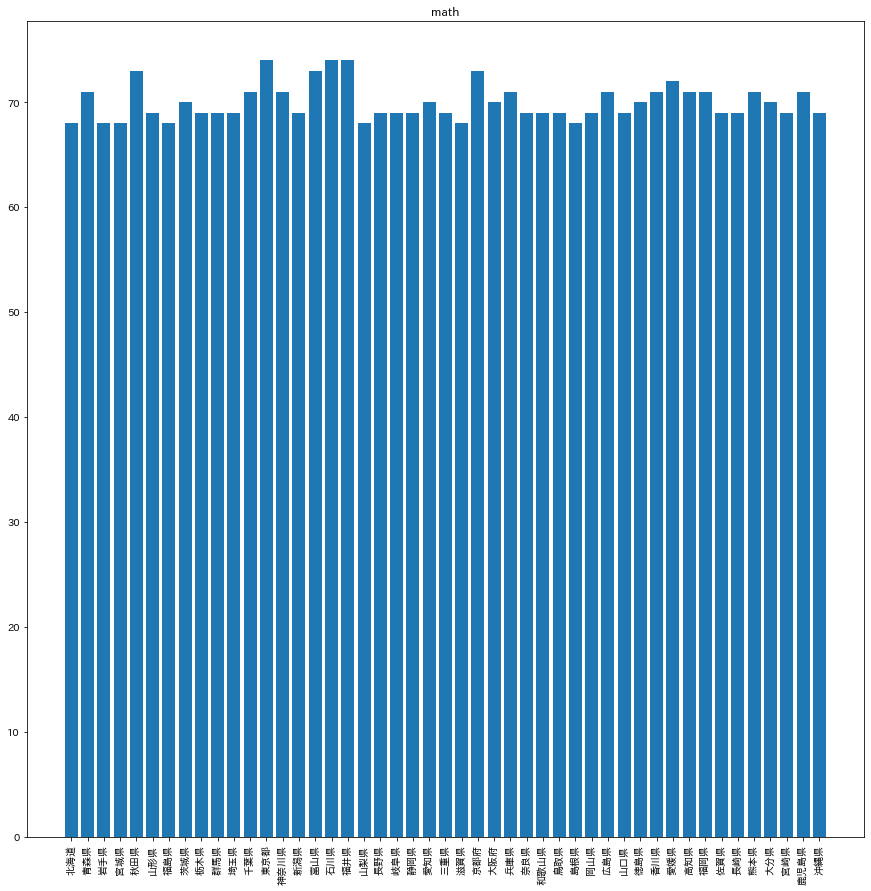

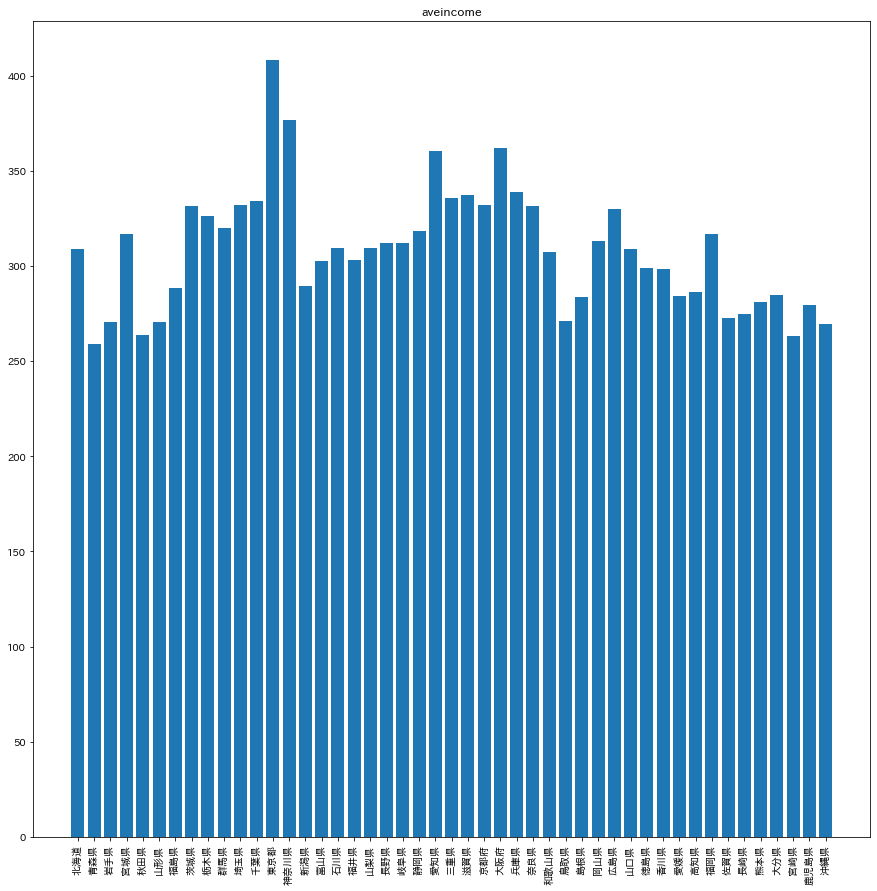

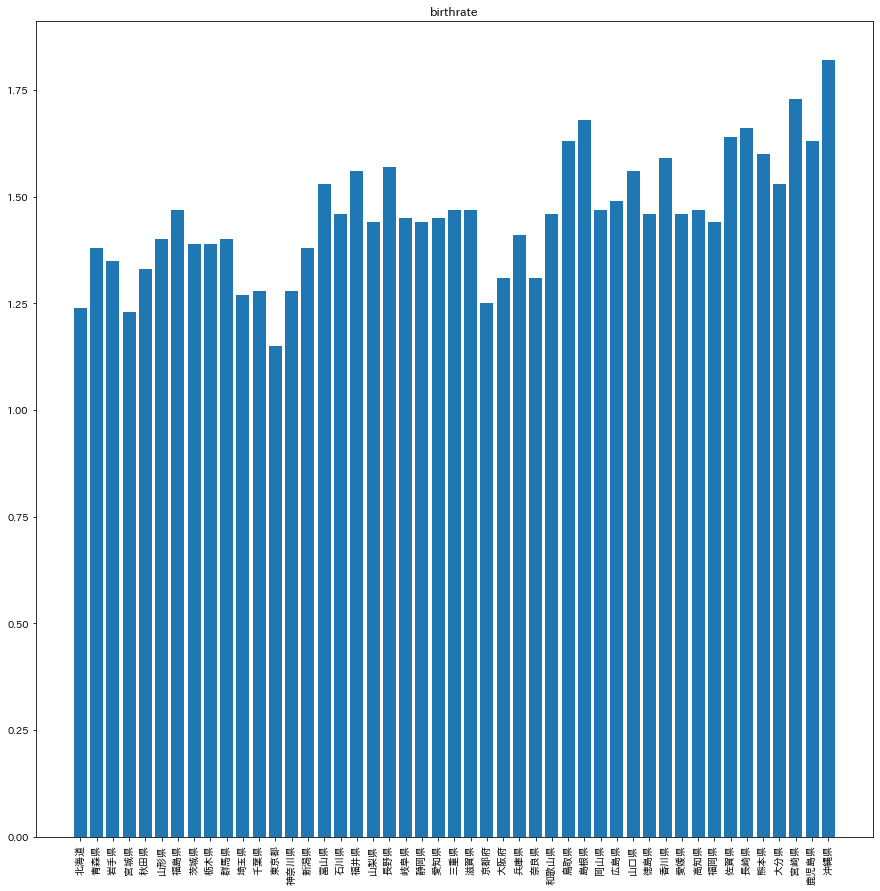

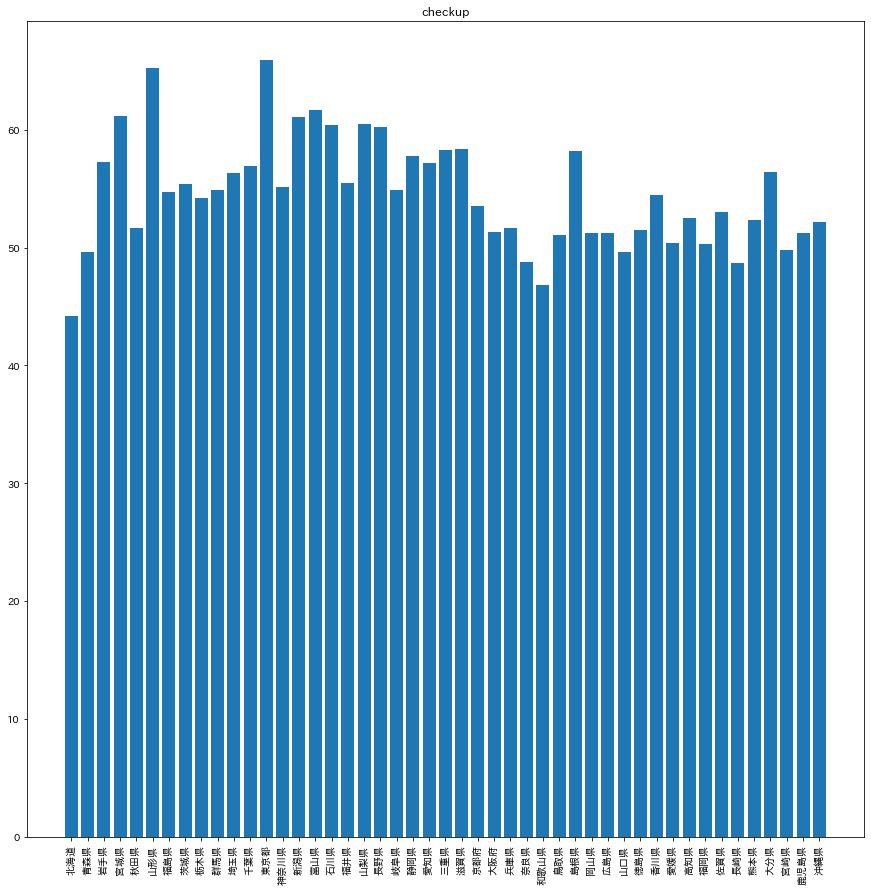

In [8]:
#棒グラフ(まとめて描く)
for i in df_prefecture.columns.tolist(): #indexをリスト化
  if i not in ['precode', 'prename']:
    plt.figure(figsize=(15, 15))
    plt.title(i)
    plt.xticks(rotation=90)
    plt.xticks(fontsize=10)
    plt.bar(df_prefecture['prename'], df_prefecture[i])
    plt.show()

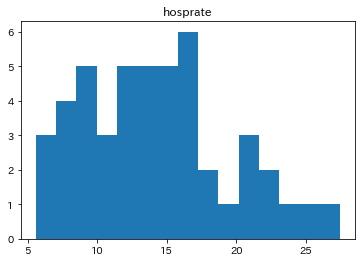

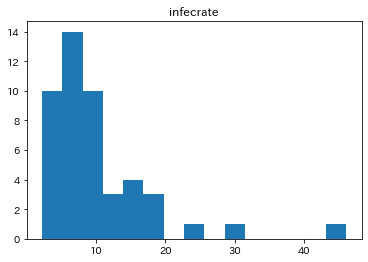

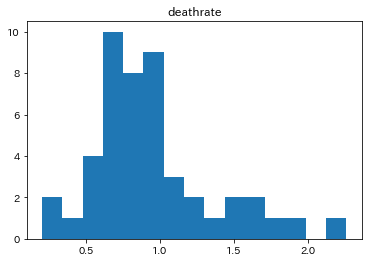

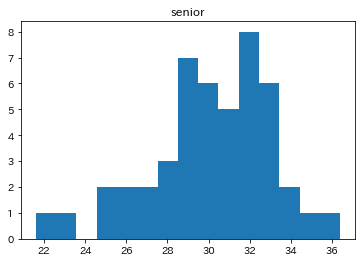

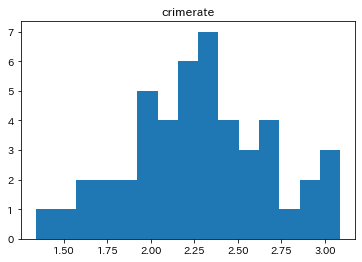

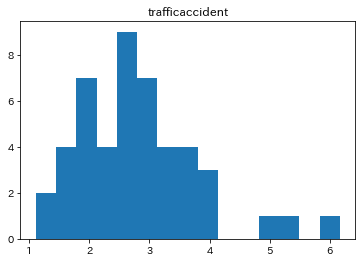

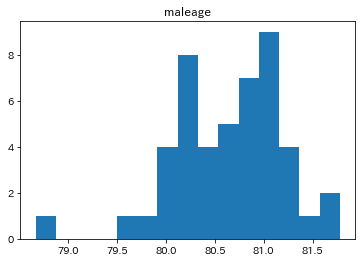

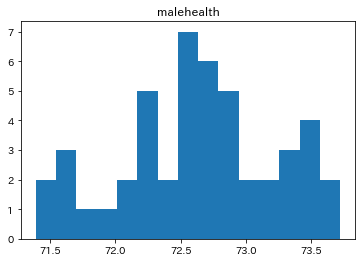

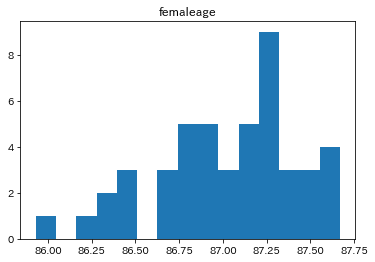

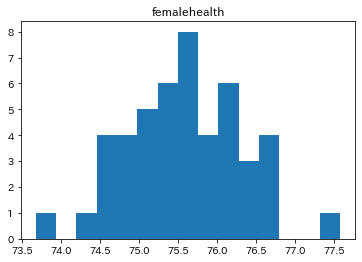

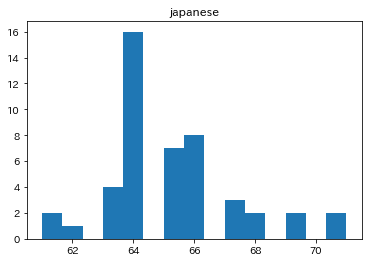

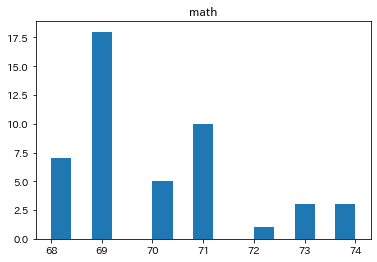

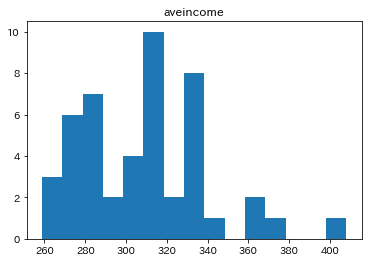

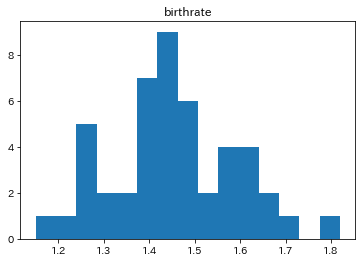

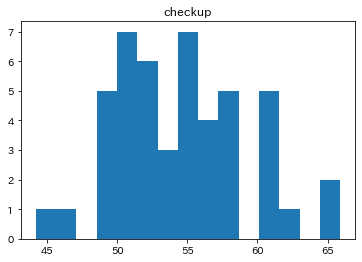

In [9]:
#ヒストグラム(まとめて描く)
for i in df_prefecture.columns.tolist(): #indexをリスト化
  if i not in ['precode', 'prename']:
    plt.title(i)
    plt.hist(df_prefecture[i], bins=15)
    plt.show()

In [10]:
#正規分布かどうかの検定
hist, bins = np.histogram(df_prefecture['femalehealth']) #ヒストグラムの値を取得
print('度数値 = {0}'.format(hist))
#シャピロ-ウィルク検定 (正規性の検定)
#帰無仮説：正規分布に従っている
#対立仮説：正規分布に従っているとは言えない
result_shapiro = stats.shapiro(hist) 
result_shapiro
print('p value(femalehealth) = {0}'.format(result_shapiro[1]))

度数値 = [1 1 6 7 9 9 8 5 0 1]
p value(femalehealth) = 0.07437862455844879


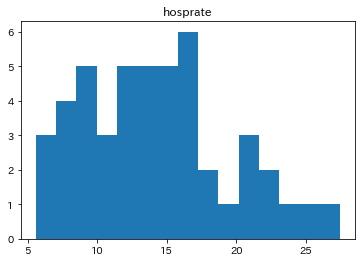

p value(hosprate) = 0.46379923820495605


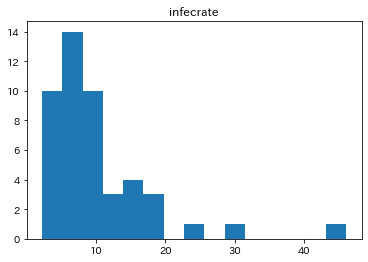

p value(infecrate) = 0.0014624561881646514


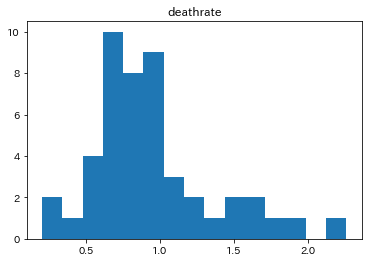

p value(deathrate) = 0.004686861764639616


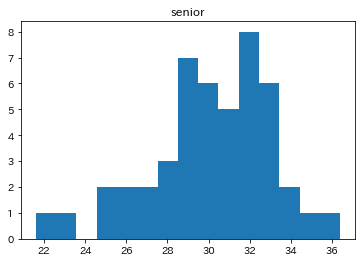

p value(senior) = 0.030149150639772415


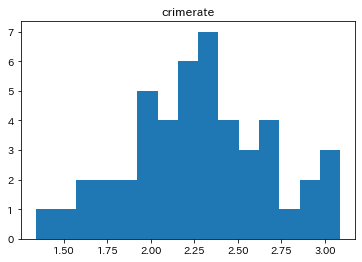

p value(crimerate) = 0.40458500385284424


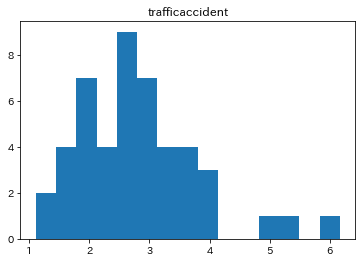

p value(trafficaccident) = 0.3544906973838806


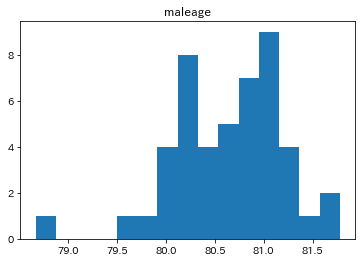

p value(maleage) = 0.13582843542099


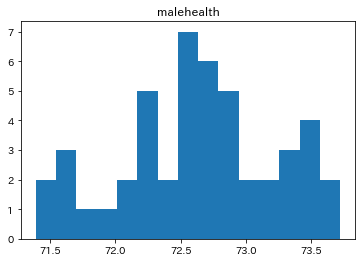

p value(malehealth) = 0.34310391545295715


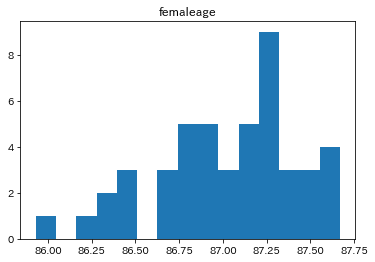

p value(femaleage) = 0.31590116024017334


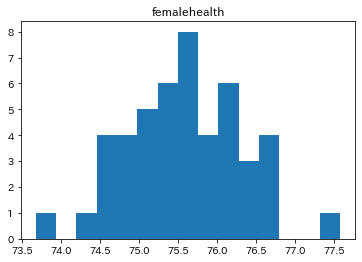

p value(femalehealth) = 0.07437862455844879


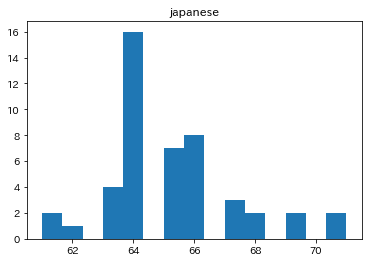

p value(japanese) = 0.003524699015542865


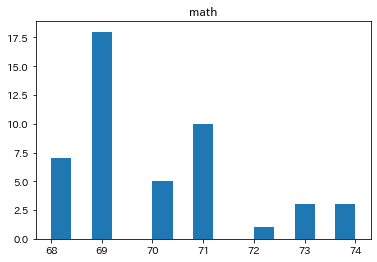

p value(math) = 0.02735450118780136


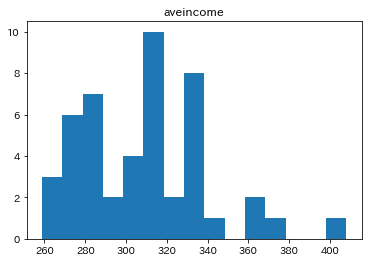

p value(aveincome) = 0.49201086163520813


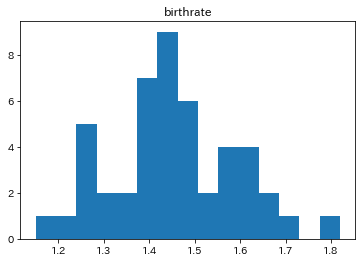

p value(birthrate) = 0.04788565635681152


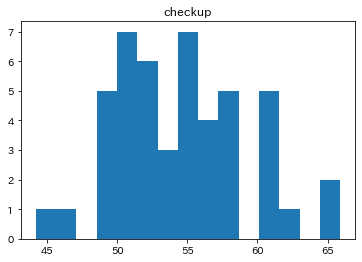

p value(checkup) = 0.15822261571884155


In [11]:
#全ての項目に対して正規性の検定を行う
for i in df_prefecture.columns.tolist(): #indexをリスト化
  if i not in ['precode', 'prename']:
    plt.title(i)
    plt.hist(df_prefecture[i], bins=15)
    plt.show()
    hist, bins = np.histogram(df_prefecture[i]) #ヒストグラムの値を取得
    result_shapiro = stats.shapiro(hist) 
    print('p value({0}) = {1}'.format(i, result_shapiro[1]))

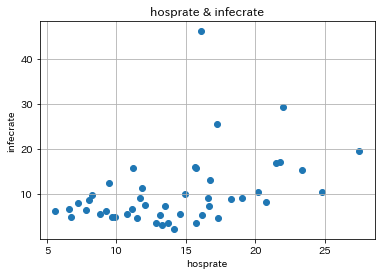

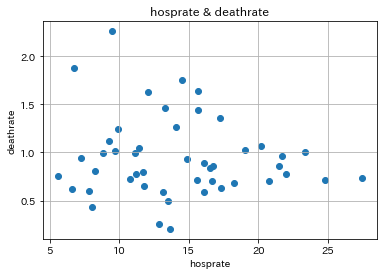

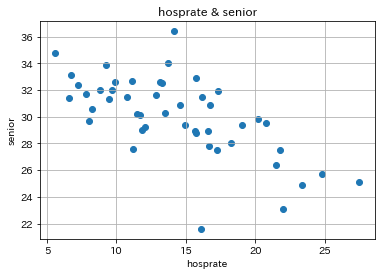

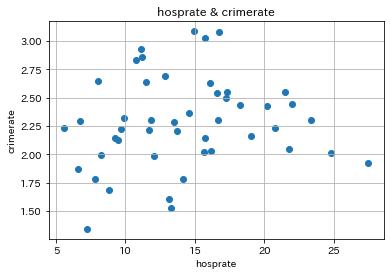

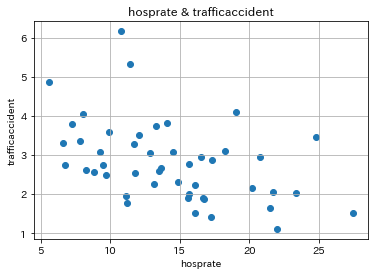

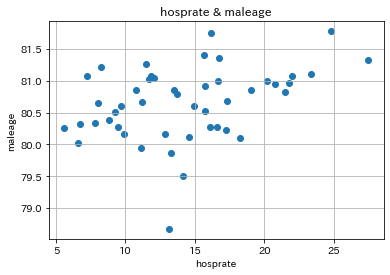

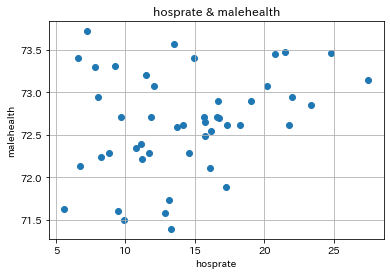

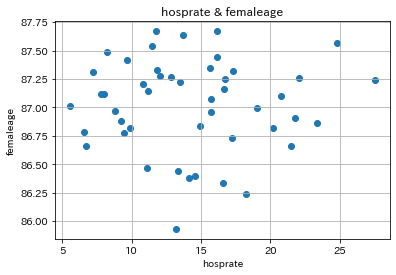

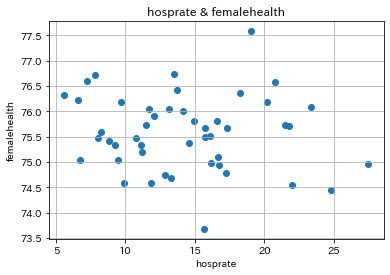

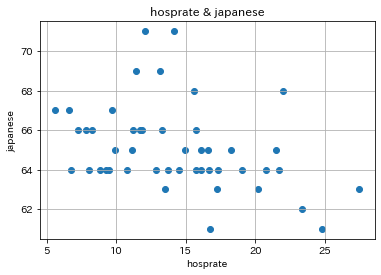

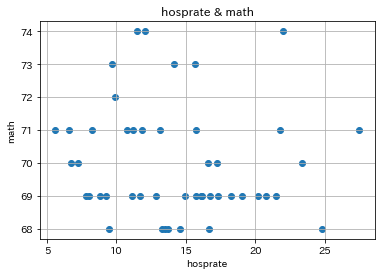

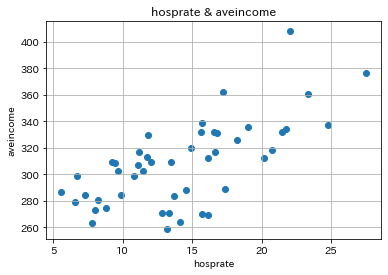

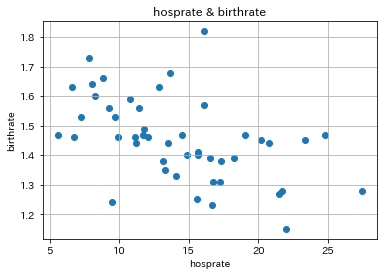

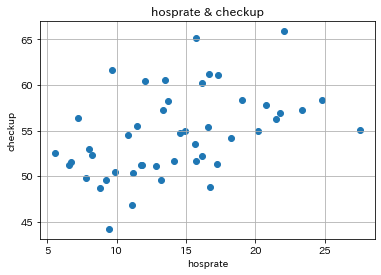

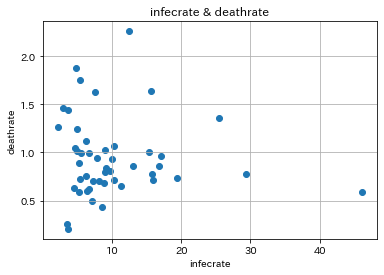

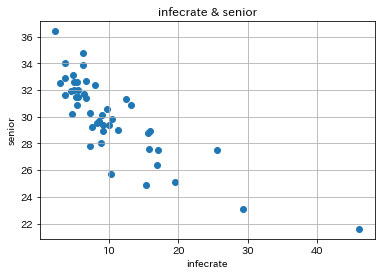

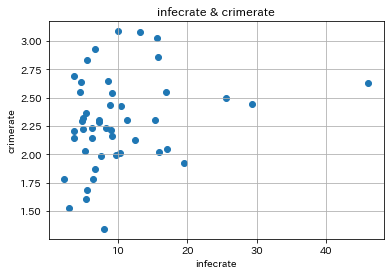

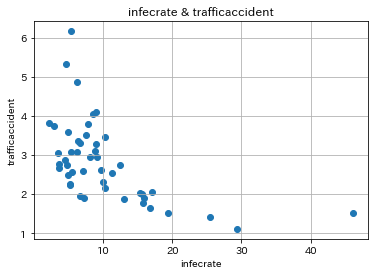

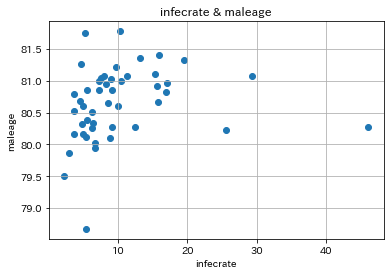

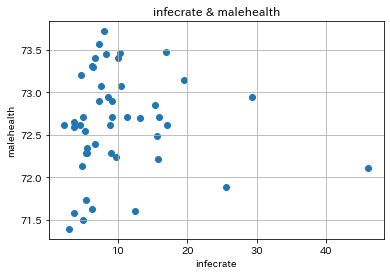

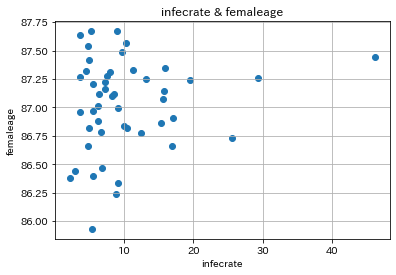

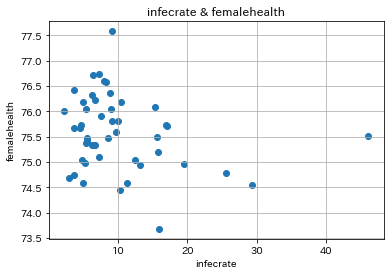

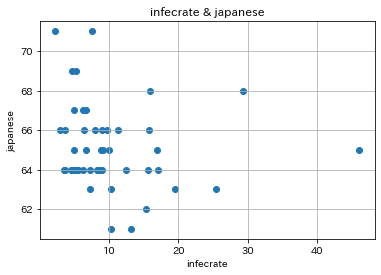

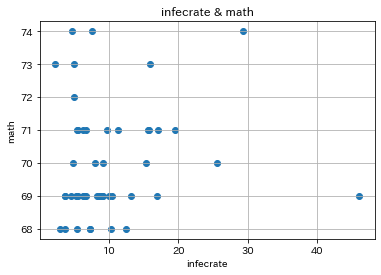

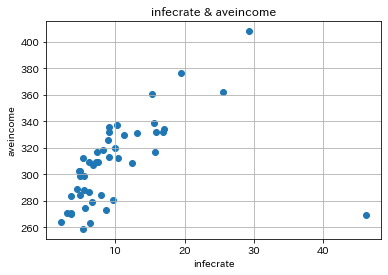

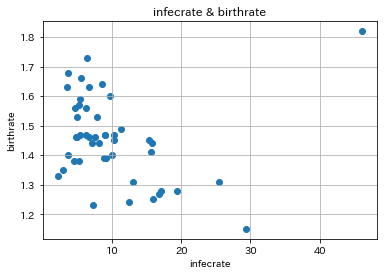

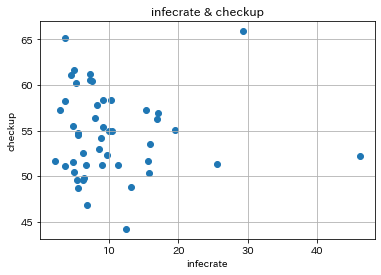

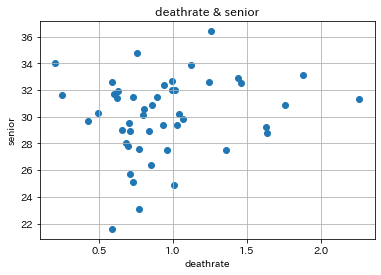

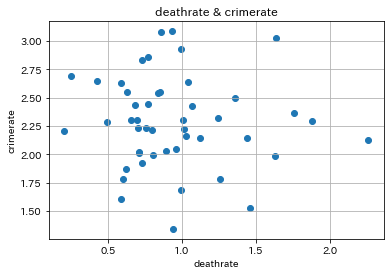

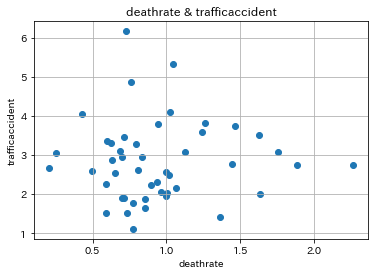

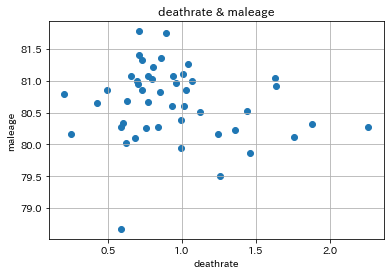

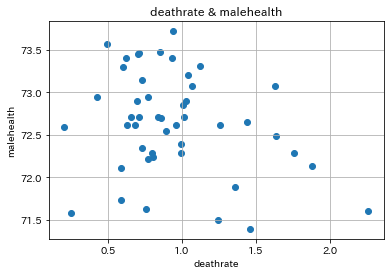

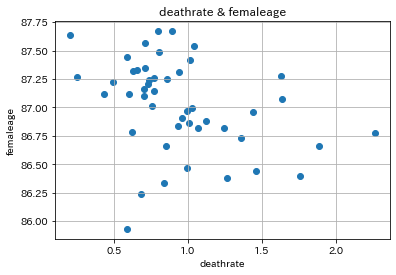

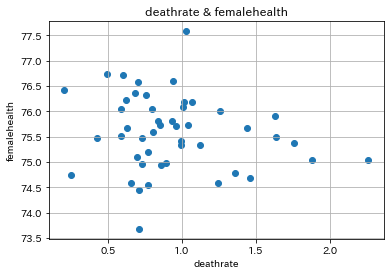

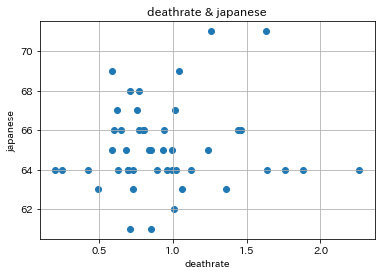

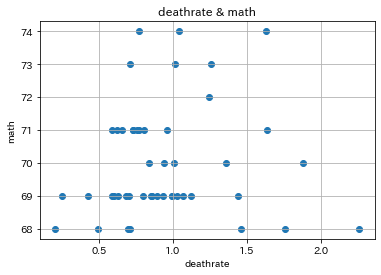

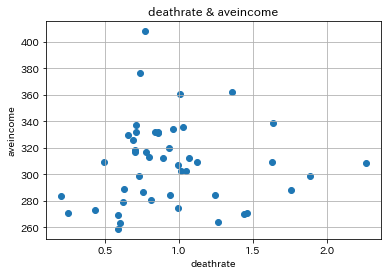

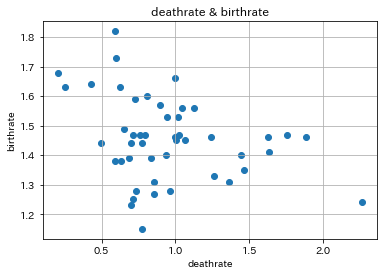

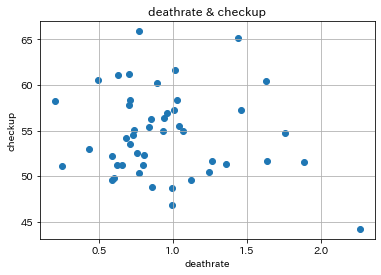

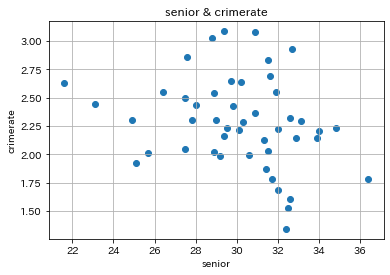

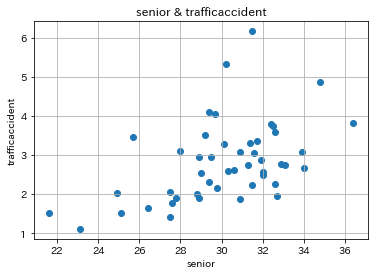

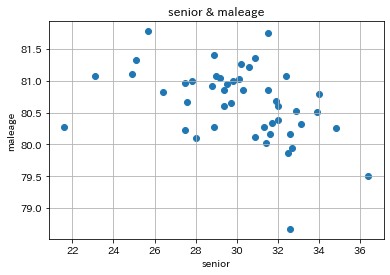

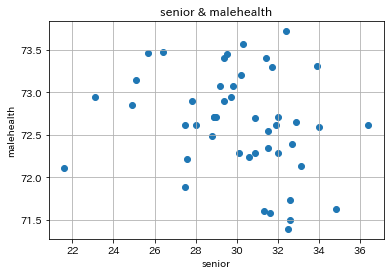

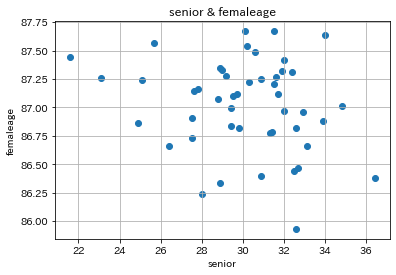

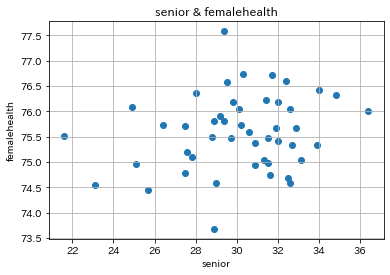

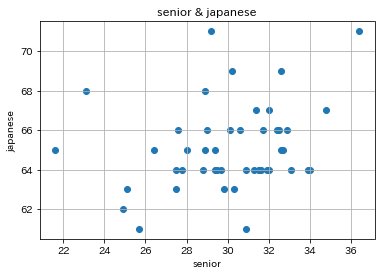

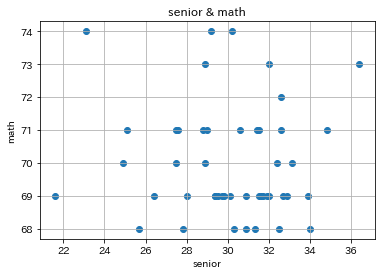

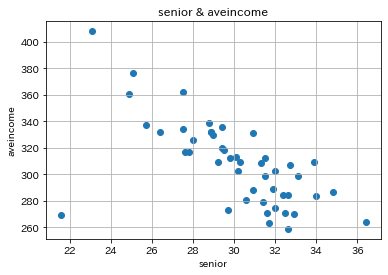

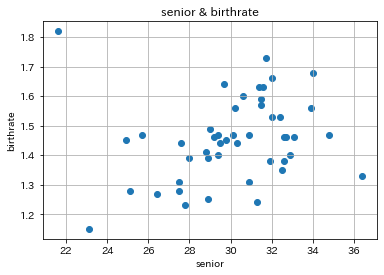

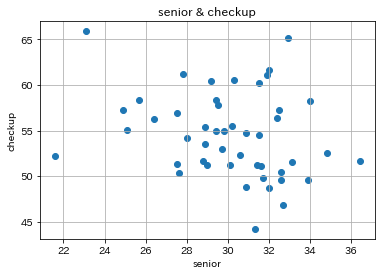

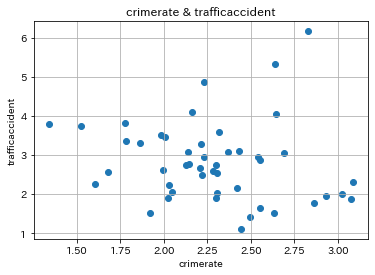

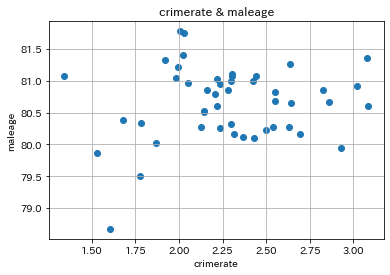

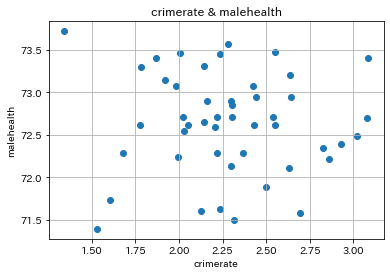

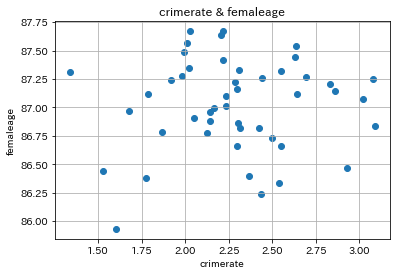

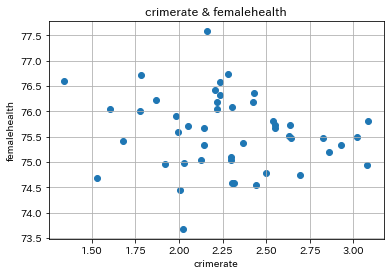

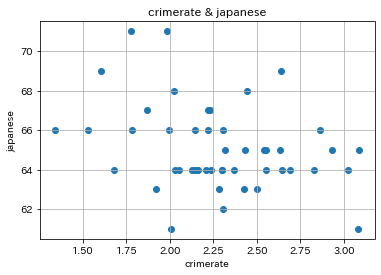

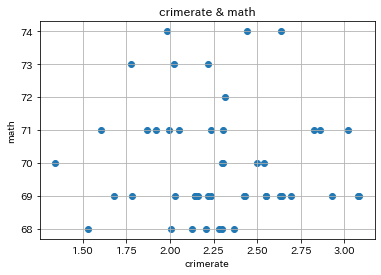

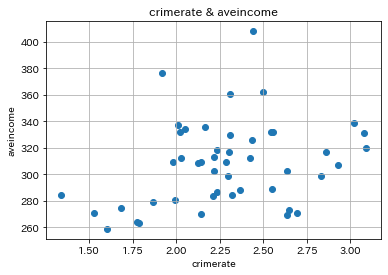

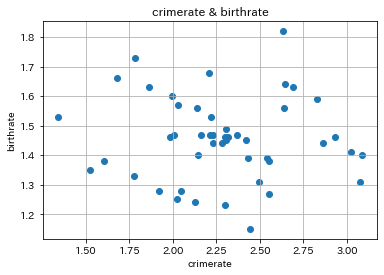

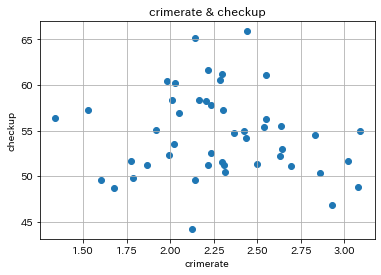

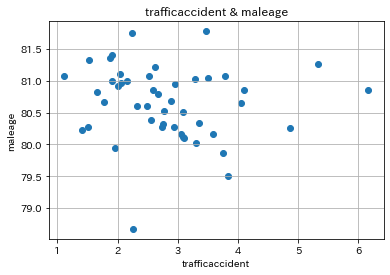

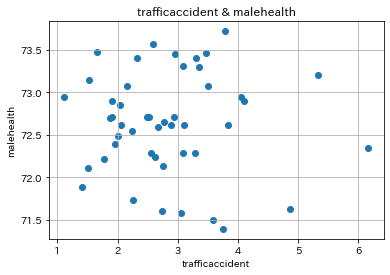

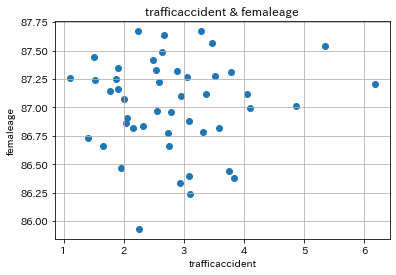

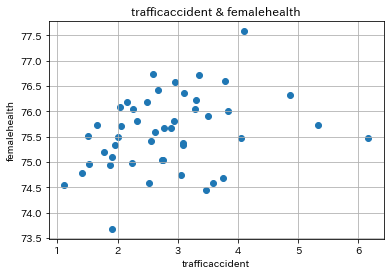

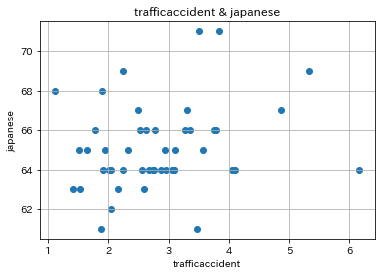

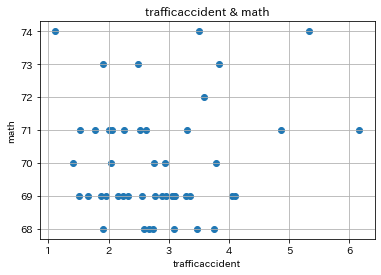

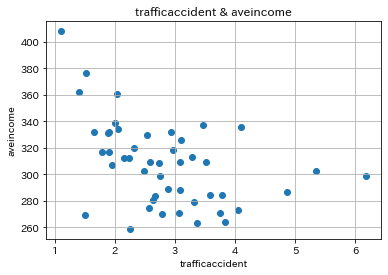

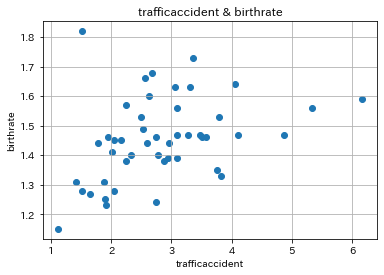

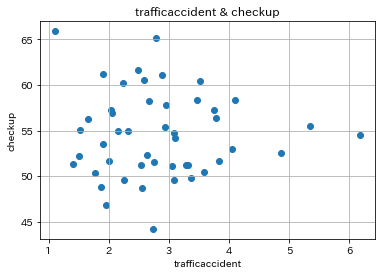

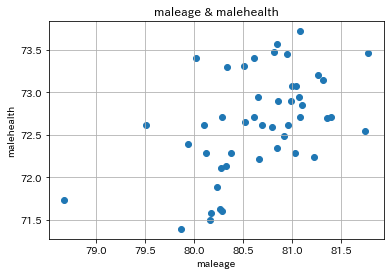

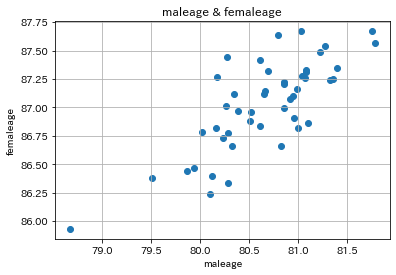

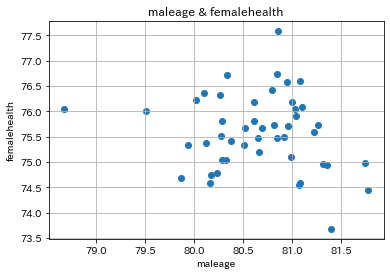

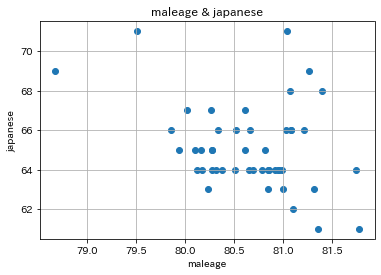

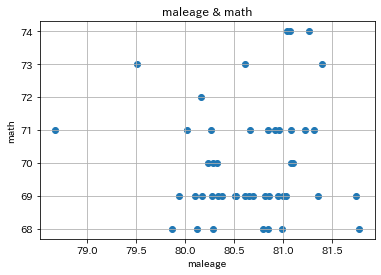

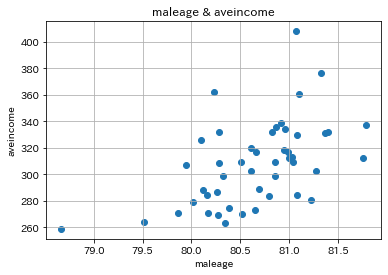

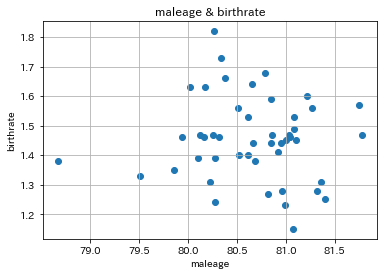

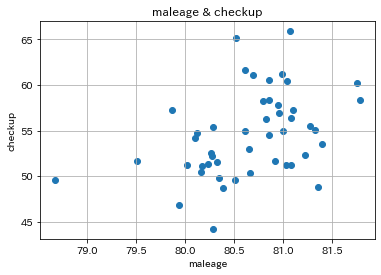

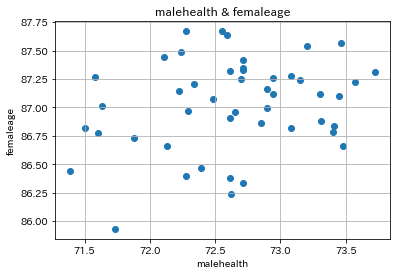

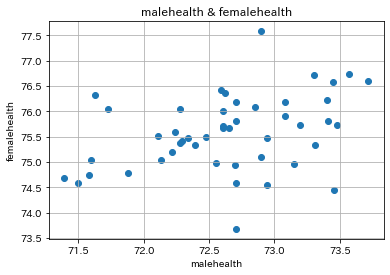

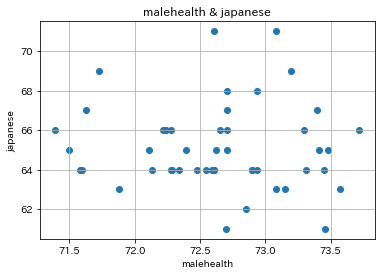

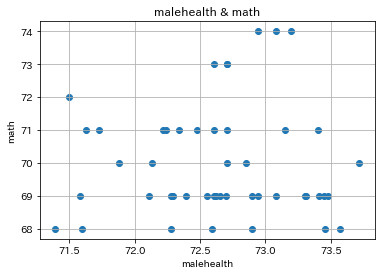

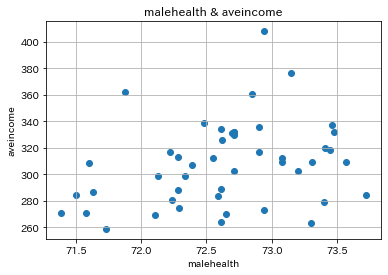

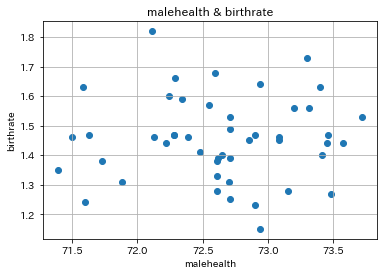

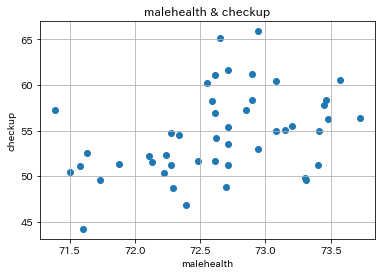

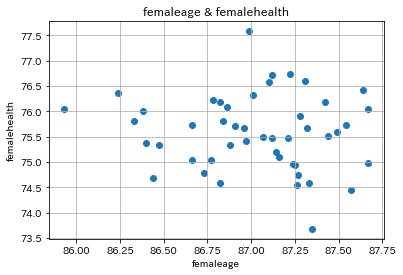

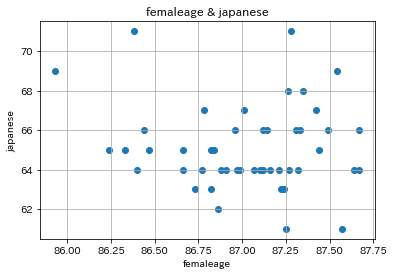

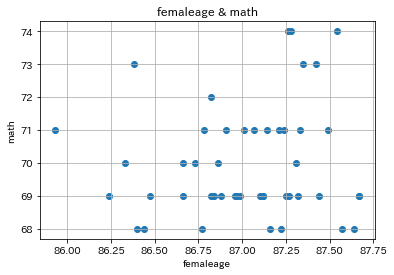

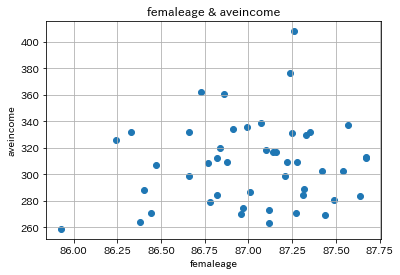

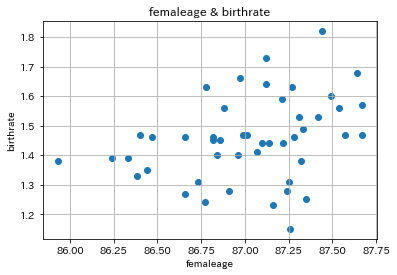

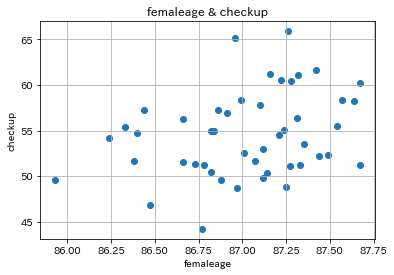

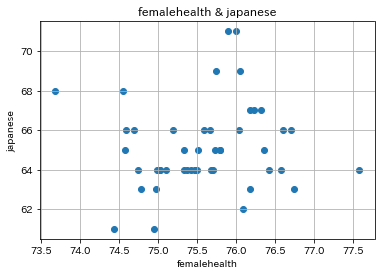

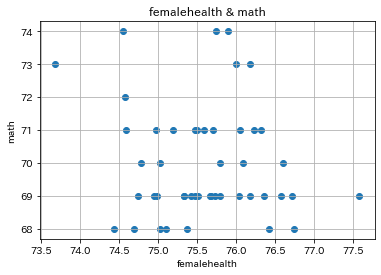

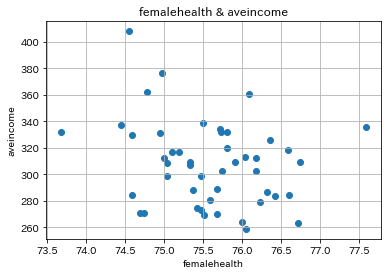

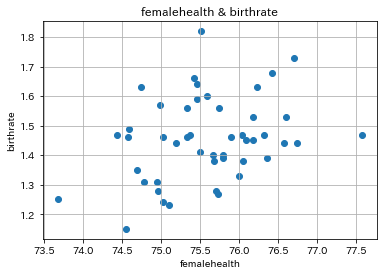

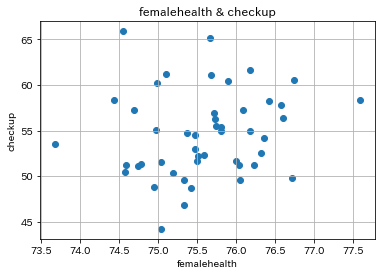

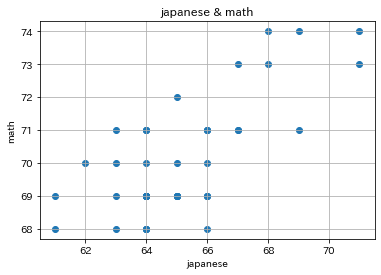

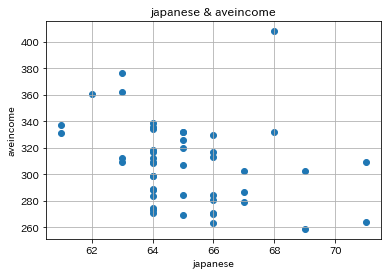

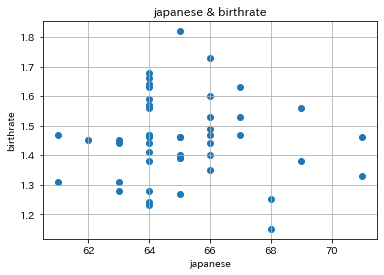

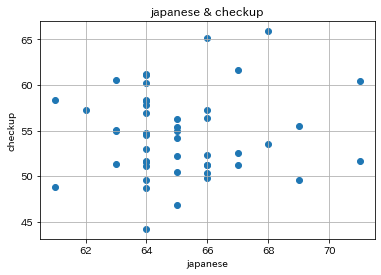

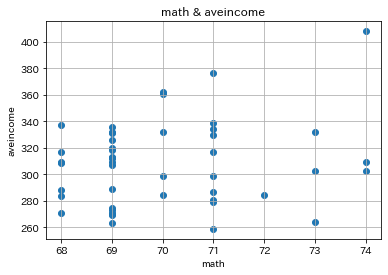

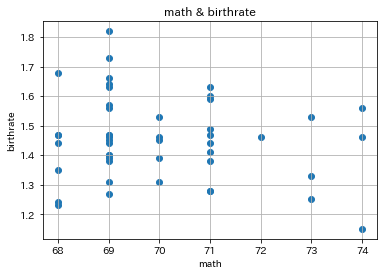

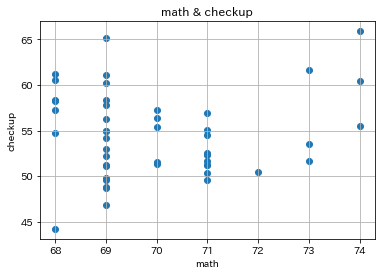

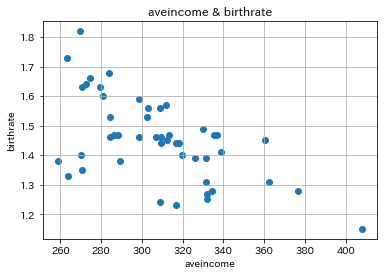

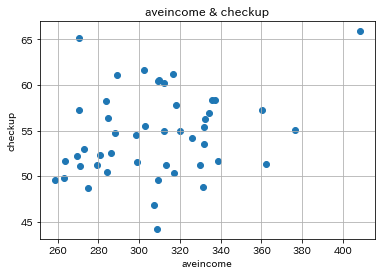

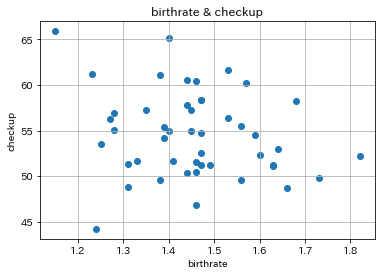

In [12]:
#散布図
index_list = df_prefecture.columns.tolist()
for i in range(len(index_list)):
  if index_list[i] in ['precode', 'prename']:
    continue
  for j in range(i+1, len(index_list)):
    plt.title(index_list[i] + ' & ' + index_list[j])
    plt.xlabel(index_list[i])
    plt.ylabel(index_list[j])
    plt.scatter(df_prefecture[index_list[i]], df_prefecture[index_list[j]])
    plt.grid()
    plt.show()

In [13]:
#相関係数行列
corr_mat = df_prefecture.corr(method='pearson')
corr_mat

,precode,hosprate,infecrate,deathrate,senior,crimerate,trafficaccident,maleage,malehealth,femaleage,femalehealth,japanese,math,aveincome,birthrate,checkup
precode,1.000000,-0.495835,0.126408,-0.317792,0.060113,0.053905,0.175165,0.152868,0.010513,0.420232,0.039918,-0.128499,0.024990,-0.232723,0.696954,-0.397037
hosprate,-0.495835,1.000000,0.417809,-0.119328,-0.656086,0.131891,-0.449839,0.366659,0.282168,0.002648,-0.106617,-0.362607,-0.098132,0.667830,-0.496045,0.447690
infecrate,0.126408,0.417809,1.000000,-0.069735,-0.814834,0.255408,-0.559485,0.179559,0.004656,0.153903,-0.236426,-0.130998,0.108229,0.483688,-0.123111,-0.013457
deathrate,-0.317792,-0.119328,-0.069735,1.000000,0.173791,-0.070671,0.017922,-0.143259,-0.270627,-0.347754,-0.161287,0.074892,0.076389,0.049144,-0.321287,-0.142500
senior,0.060113,-0.656086,-0.814834,0.173791,1.000000,-0.264605,0.492039,-0.410063,-0.242474,-0.201581,0.208502,0.246294,-0.051560,-0.659515,0.205590,-0.247594
crimerate,0.053905,0.131891,0.255408,-0.070671,-0.264605,1.000000,-0.139424,0.140395,-0.040118,0.071103,-0.155801,-0.314976,-0.054382,0.291950,-0.049030,-0.102805
trafficaccident,0.175165,-0.449839,-0.559485,0.017922,0.492039,-0.139424,1.000000,-0.086167,-0.028721,0.044486,0.299906,0.229888,0.106651,-0.448634,0.367999,-0.033931
maleage,0.152868,0.366659,0.179559,-0.143259,-0.410063,0.140395,-0.086167,1.000000,0.496965,0.771480,-0.161219,-0.333012,0.053220,0.526151,-0.056943,0.402825
malehealth,0.010513,0.282168,0.004656,-0.270627,-0.242474,-0.040118,-0.028721,0.496965,1.000000,0.255832,0.356789,-0.059009,0.013003,0.290751,0.016782,0.395657
femaleage,0.420232,0.002648,0.153903,-0.347754,-0.201581,0.071103,0.044486,0.771480,0.255832,1.000000,-0.099042,-0.114120,0.103880,0.121338,0.323269,0.300624


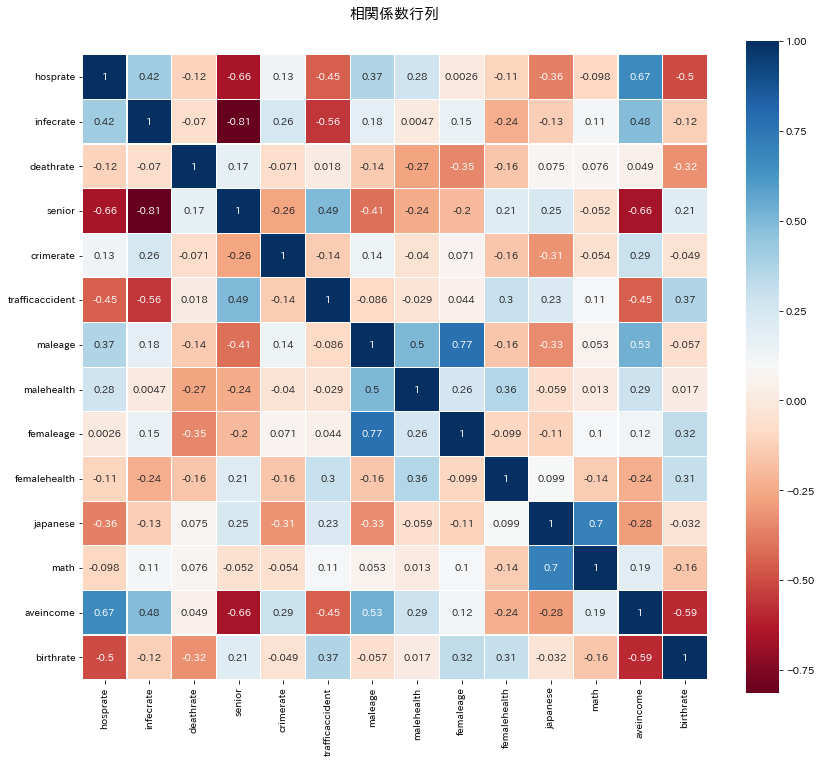

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('相関係数行列', y=1.05, size=15)
sbn.heatmap(df_prefecture.iloc[:,2:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [15]:
#回帰直線(infecrate & senior)
lr = LinearRegression() #線形モデル作成
#説明変数(2次元)、目的変数(1次元)、numpy形式で渡す
lr.fit(df_prefecture[['infecrate']].values, df_prefecture['senior'].values) #学習
print('coefficient = ', lr.coef_[0]) # 説明変数の係数
print('intercept = ', lr.intercept_) # 切片
print('R^2 = ', lr.score(df_prefecture[['infecrate']].values, df_prefecture['senior'].values)) # 決定係数

coefficient =  -0.3095752264983566
intercept =  33.21905469782484
R^2 =  0.6639551468014255


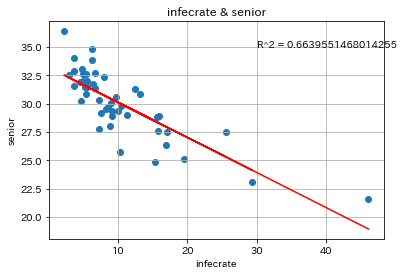

In [16]:
#散布図に回帰直線を描く
plt.title('infecrate & senior')
plt.xlabel('infecrate')
plt.ylabel('senior')
plt.scatter(df_prefecture['infecrate'], df_prefecture['senior'])
plt.plot(df_prefecture[['infecrate']].values, lr.predict(df_prefecture[['infecrate']].values), color = 'red')
plt.text(30,35, 'R^2 = {}'.format(lr.score(df_prefecture[['infecrate']].values, df_prefecture['senior'].values)))
plt.grid()
plt.show()

coefficient =  0.6299826519716075
intercept =  1.1630929823079565
R^2 =  0.17456444379616742


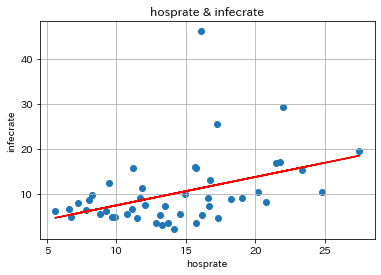

coefficient =  -0.00952245374946059
intercept =  1.0814339532581514
R^2 =  0.014239218000178244


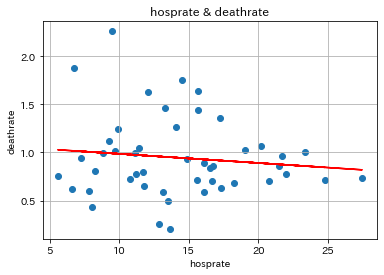

coefficient =  -0.3758445243908408
intercept =  35.43866098816375
R^2 =  0.43044870581055483


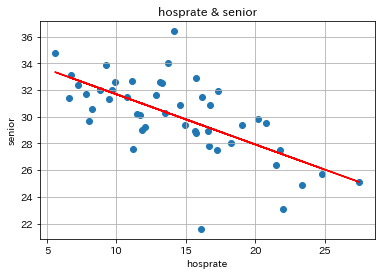

coefficient =  0.010187409985731853
intercept =  2.1378921751264337
R^2 =  0.01739522747840938


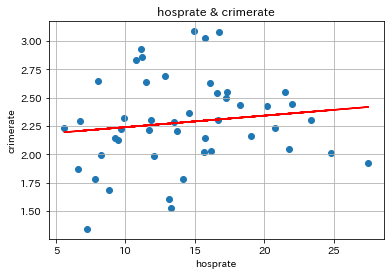

coefficient =  -0.0885211649643
intercept =  4.091842055929739
R^2 =  0.20235472051811676


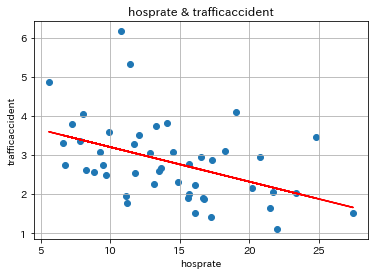

coefficient =  0.040741076530694635
intercept =  80.07088649129781
R^2 =  0.13443862304941756


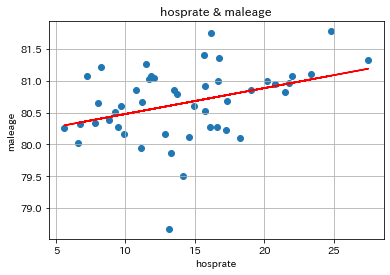

coefficient =  0.03247718293457133
intercept =  72.17474252050401
R^2 =  0.07961853924415319


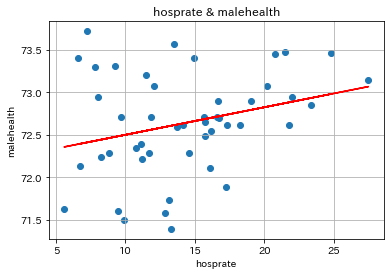

coefficient =  0.00020626347375662504
intercept =  87.01918495818636
R^2 =  7.014297673246794e-06


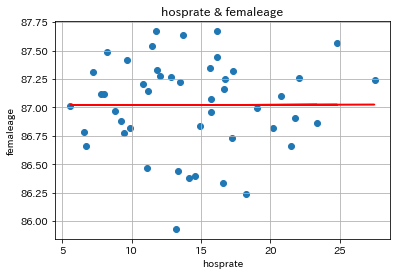

coefficient =  -0.015220363405983461
intercept =  75.80033601672892
R^2 =  0.01136708380725282


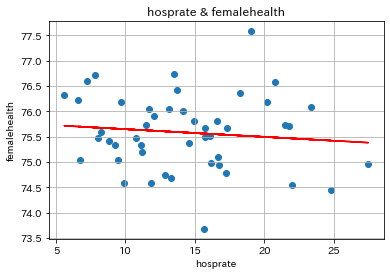

coefficient =  -0.15089124884264515
intercept =  67.25910483166572
R^2 =  0.1314835353163204


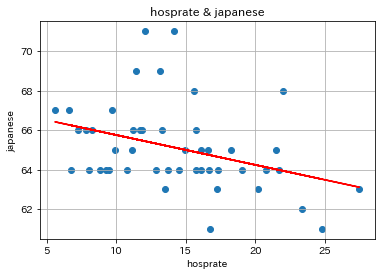

coefficient =  -0.03239588658056563
intercept =  70.48345935002854
R^2 =  0.009629868669396524


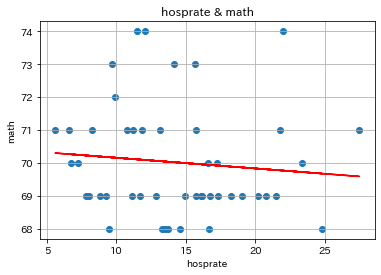

coefficient =  4.08050062373354
intercept =  249.96339991113192
R^2 =  0.44599718636554253


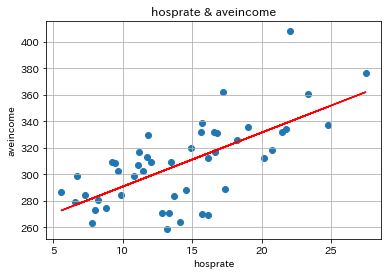

coefficient =  -0.013444199966135847
intercept =  1.64669813374715
R^2 =  0.2460606253160823


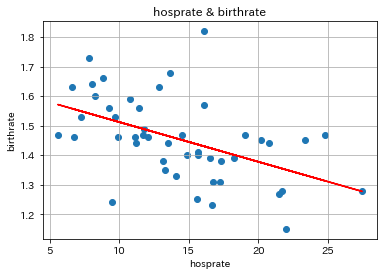

coefficient =  0.4032799776979857
intercept =  48.816733836573775
R^2 =  0.20042594303291605


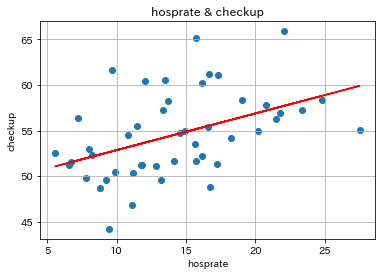

coefficient =  -0.003690671152151736
intercept =  0.9830433926450179
R^2 =  0.004862957647029931


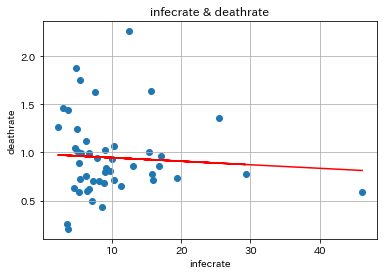

coefficient =  -0.3095752264983566
intercept =  33.21905469782484
R^2 =  0.6639551468014255


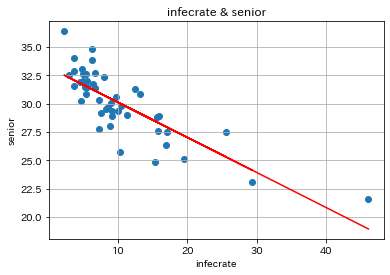

coefficient =  0.013083774063188452
intercept =  2.150421275122766
R^2 =  0.06523339884133916


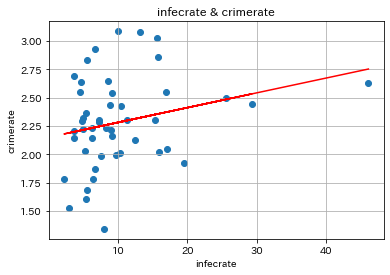

coefficient =  -0.0730177476131302
intercept =  3.570130087183081
R^2 =  0.31302379644225997


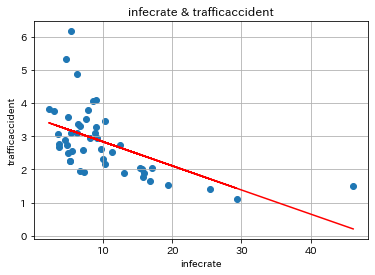

coefficient =  0.013232052155691208
intercept =  80.51781077241444
R^2 =  0.032241471472529204


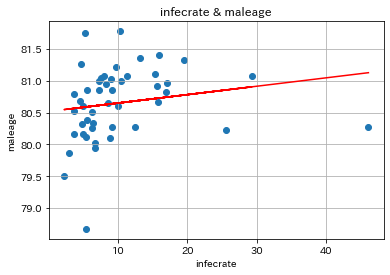

coefficient =  0.00035541880542725867
intercept =  72.63447729506078
R^2 =  2.1679022675469284e-05


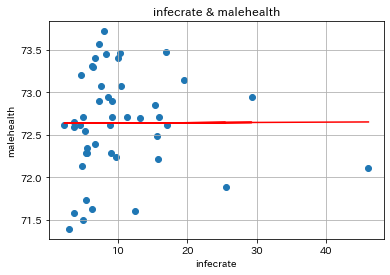

coefficient =  0.007949245400437675
intercept =  86.94143587534515
R^2 =  0.023686055221780022


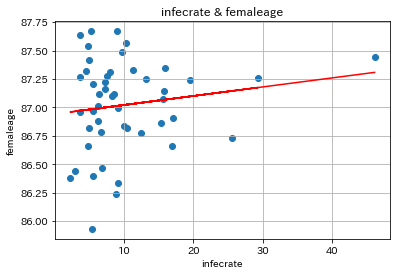

coefficient =  -0.02238442267063746
intercept =  75.8104129315551
R^2 =  0.05589747691451852


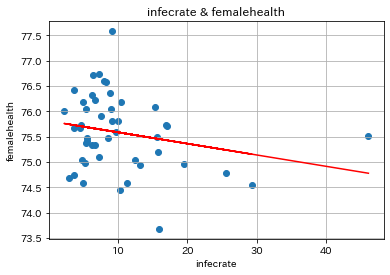

coefficient =  -0.036152865705777096
intercept =  65.47336614402373
R^2 =  0.01716050698646232


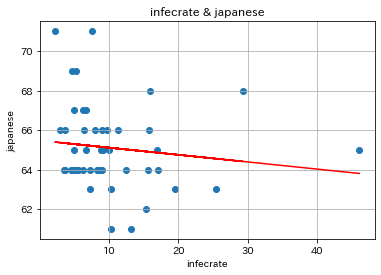

coefficient =  0.023695846592688724
intercept =  69.78074305525507
R^2 =  0.011713494432257776


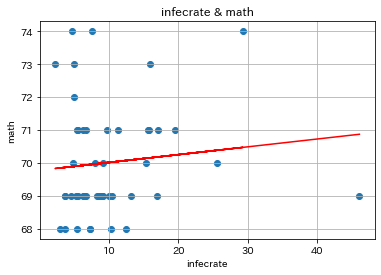

coefficient =  1.9600275124774775
intercept =  288.2827321304636
R^2 =  0.23395425507518686


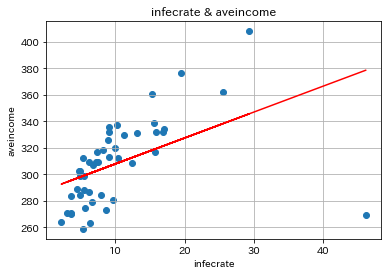

coefficient =  -0.0022128891360356164
intercept =  1.4773563746408276
R^2 =  0.015156289824377223


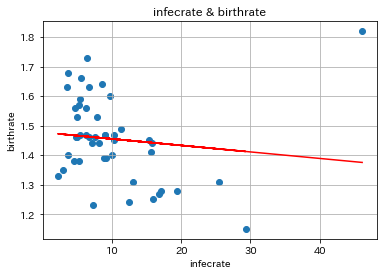

coefficient =  -0.008039301194211269
intercept =  54.65181869515445
R^2 =  0.00018108338588906925


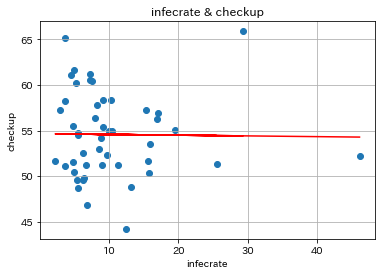

coefficient =  1.2475806494664536
intercept =  28.89690861285438
R^2 =  0.03020325966596149


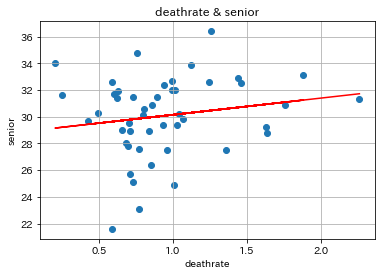

coefficient =  -0.06840464287778779
intercept =  2.3479150625421648
R^2 =  0.00499442284332996


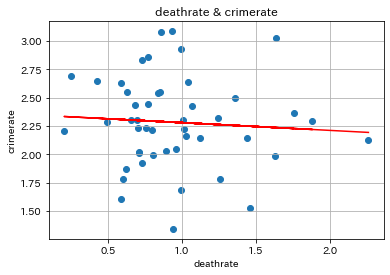

coefficient =  0.04419494071062588
intercept =  2.7871463245058328
R^2 =  0.00032120020566162033


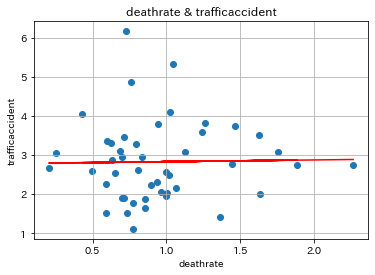

coefficient =  -0.19947429349052181
intercept =  80.84074653344172
R^2 =  0.020523174163483704


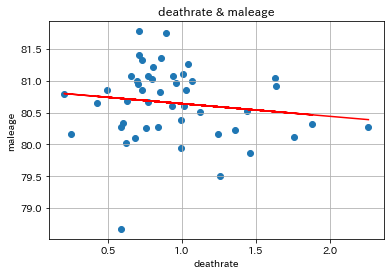

coefficient =  -0.3903336778252246
intercept =  73.00717676955188
R^2 =  0.07323878895456593


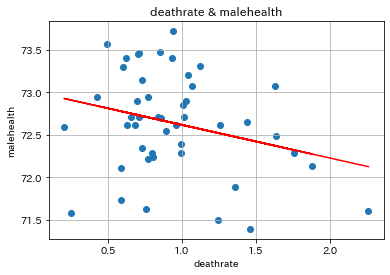

coefficient =  -0.3393882269391087
intercept =  87.34304633059159
R^2 =  0.12093296144472476


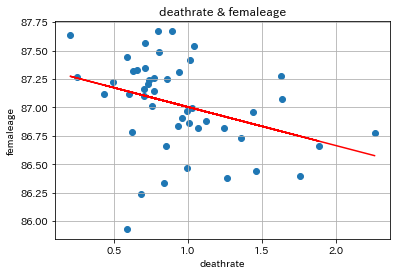

coefficient =  -0.28853278664217175
intercept =  75.8560222804271
R^2 =  0.02601363027283543


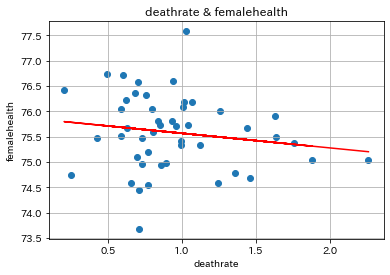

coefficient =  0.39053475368878743
intercept =  64.73710118226823
R^2 =  0.005608855446952221


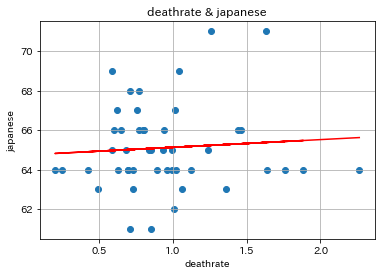

coefficient =  0.316011368160752
intercept =  69.72246261150282
R^2 =  0.005835225474126959


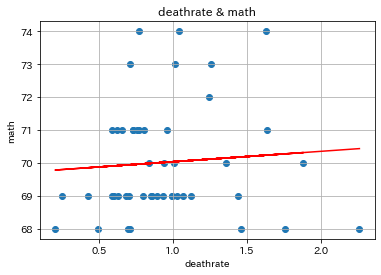

coefficient =  3.7628445996136684
intercept =  304.6206533467201
R^2 =  0.0024151793817398515


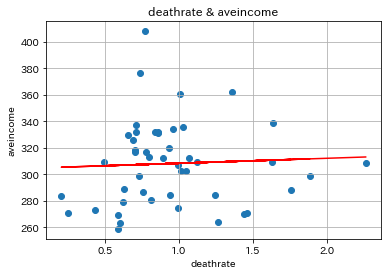

coefficient =  -0.10911909584512616
intercept =  1.5580744360409418
R^2 =  0.10322510157885101


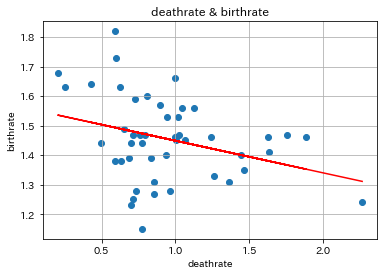

coefficient =  -1.6085661839430234
intercept =  56.09124054776885
R^2 =  0.020306266836840114


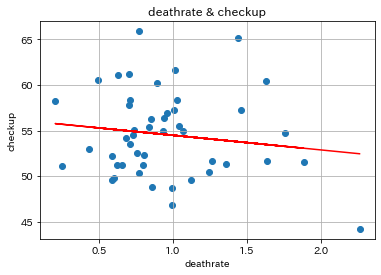

coefficient =  -0.035677942910210404
intercept =  3.3563040760398604
R^2 =  0.07001598526628194


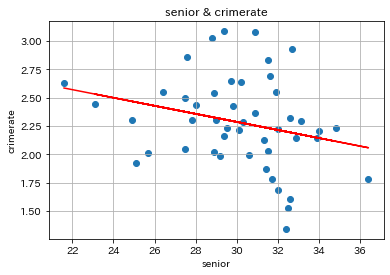

coefficient =  0.1690215297379243
intercept =  -2.2546560518623355
R^2 =  0.242101902968348


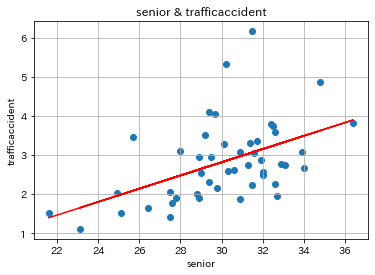

coefficient =  -0.07953774509393298
intercept =  83.04435226520816
R^2 =  0.16815146378565382


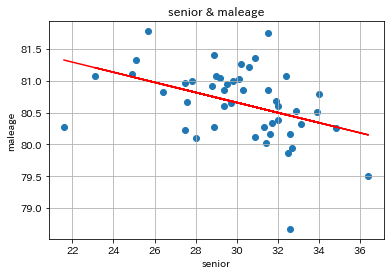

coefficient =  -0.04871788965852265
intercept =  74.10335337917633
R^2 =  0.05879352314332975


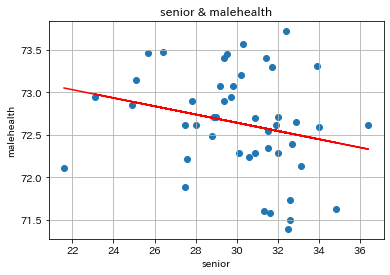

coefficient =  -0.02740513472314117
intercept =  87.84638081797088
R^2 =  0.040634832008737964


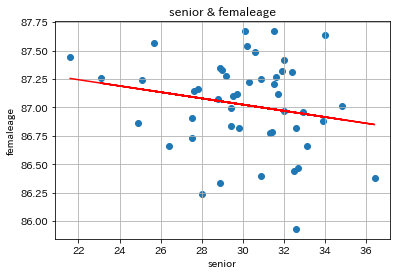

coefficient =  0.05195918102401297
intercept =  74.02043620647778
R^2 =  0.043472904887185915


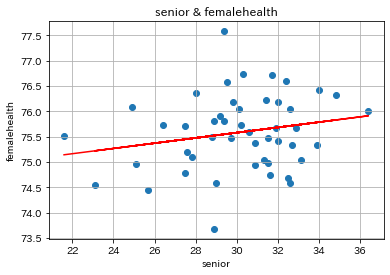

coefficient =  0.1789101957401188
intercept =  59.725373346846126
R^2 =  0.06066085079176631


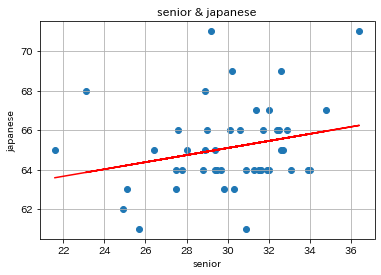

coefficient =  -0.02971279723266859
intercept =  70.91493638655533
R^2 =  0.002658414834373568


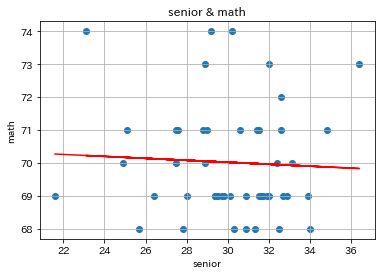

coefficient =  -7.034355552670593
intercept =  519.7481916862798
R^2 =  0.4349595817132895


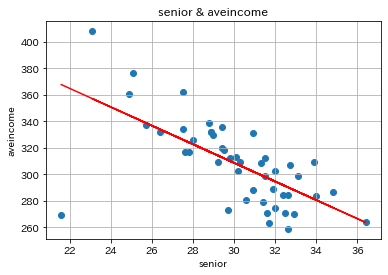

coefficient =  0.00972675324348999
intercept =  1.1623459918085648
R^2 =  0.04226715747694387


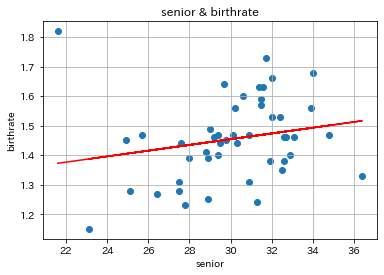

coefficient =  -0.3893344877840412
intercept =  66.28006876450044
R^2 =  0.06130295579604883


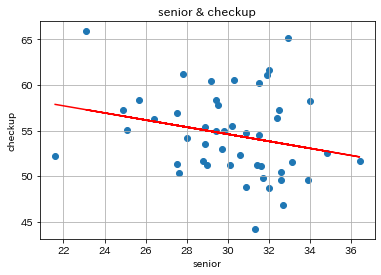

coefficient =  -0.3552061036131757
intercept =  3.639954471381195
R^2 =  0.019439155531568275


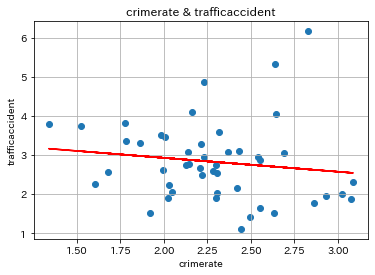

coefficient =  0.20196321491393385
intercept =  80.19099858045146
R^2 =  0.019710655239609354


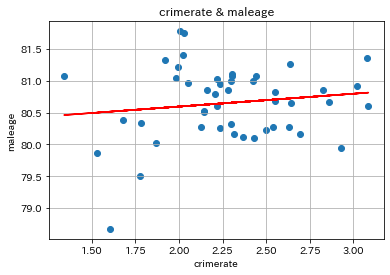

coefficient =  -0.05978087679106447
intercept =  72.77457877764671
R^2 =  0.0016094575239967712


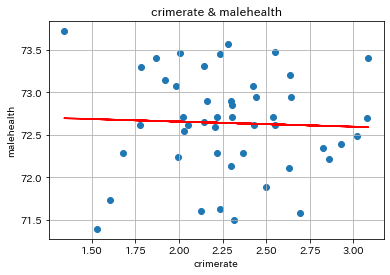

coefficient =  0.07169157968845602
intercept =  86.85843907828158
R^2 =  0.0050556068501491636


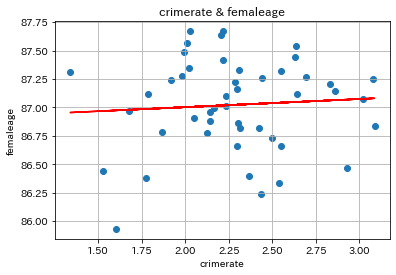

coefficient =  -0.2879529215674614
intercept =  76.24065510524724
R^2 =  0.024273894107594396


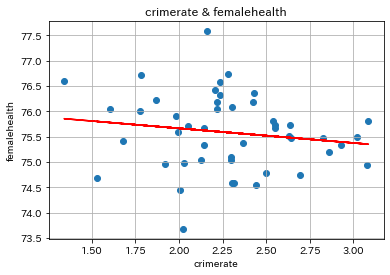

coefficient =  -1.696901676975999
intercept =  68.980804902536
R^2 =  0.09920968735807689


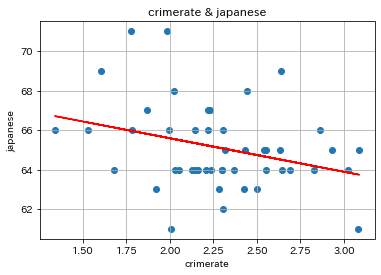

coefficient =  -0.23242855283273914
intercept =  70.55196514006859
R^2 =  0.00295744745640536


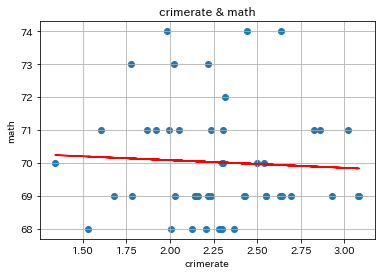

coefficient =  23.094388918784016
intercept =  255.44885227616123
R^2 =  0.08523454136792386


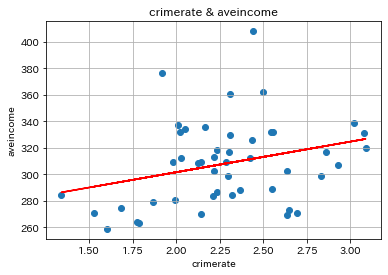

coefficient =  -0.017203971701764756
intercept =  1.494174293116048
R^2 =  0.002403959196486838


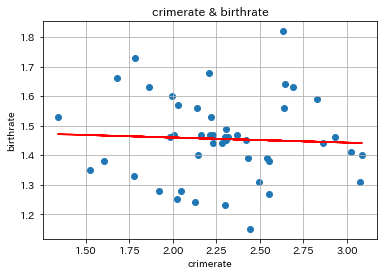

coefficient =  -1.1989338213951692
intercept =  57.30765804392539
R^2 =  0.01056886850413663


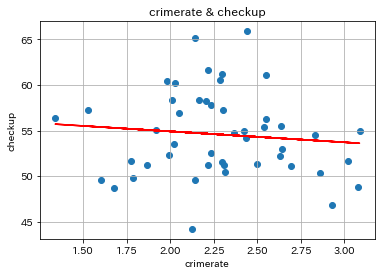

coefficient =  -0.04865413712018028
intercept =  80.78976710790423
R^2 =  0.007424710176646143


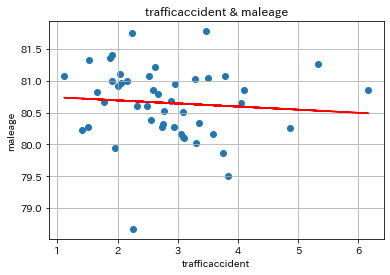

coefficient =  -0.016799030840670335
intercept =  72.68560849235267
R^2 =  0.0008249105509223753


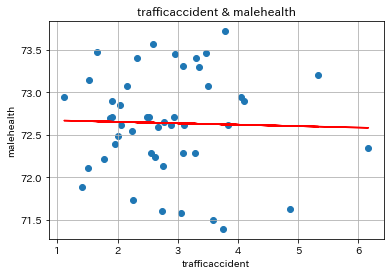

coefficient =  0.017606160840948532
intercept =  86.97232095435291
R^2 =  0.001979018111591624


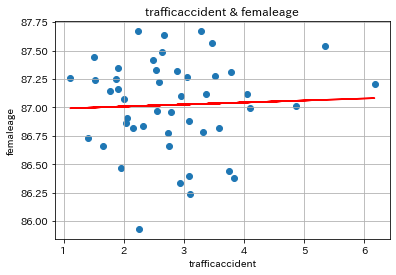

coefficient =  0.21756829307309863
intercept =  74.96770467559577
R^2 =  0.08994377859624181


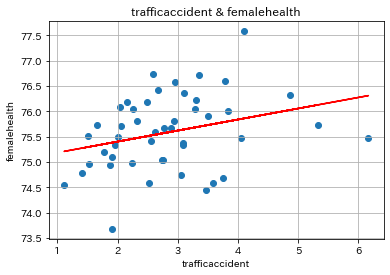

coefficient =  0.48613234962312785
intercept =  63.73114559136402
R^2 =  0.052848566603572844


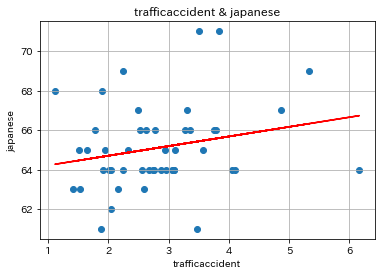

coefficient =  0.17891810509618708
intercept =  69.51512869673215
R^2 =  0.011374442144756913


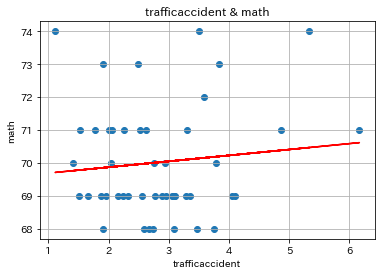

coefficient =  -13.92992635216012
intercept =  347.5855959102811
R^2 =  0.20127218615932707


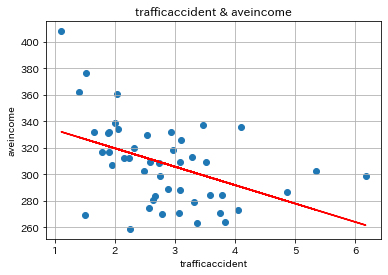

coefficient =  0.0506839399762164
intercept =  1.3115119859736653
R^2 =  0.13542343758567088


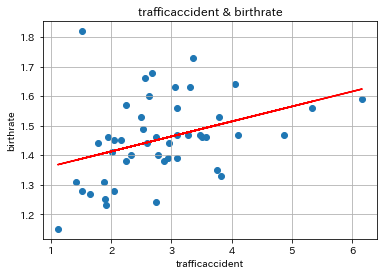

coefficient =  -0.1553243918199593
intercept =  55.00961555609322
R^2 =  0.0011513327006874574


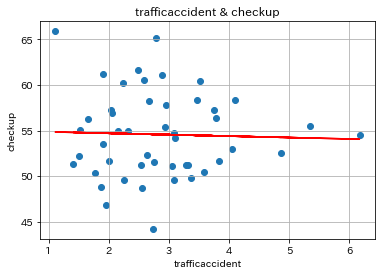

coefficient =  0.5147859621157891
intercept =  31.11950197246349
R^2 =  0.2469743427915344


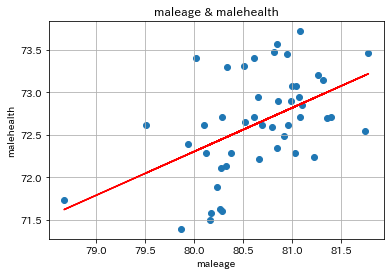

coefficient =  0.5407349318598481
intercept =  43.41070490522269
R^2 =  0.5951813786423883


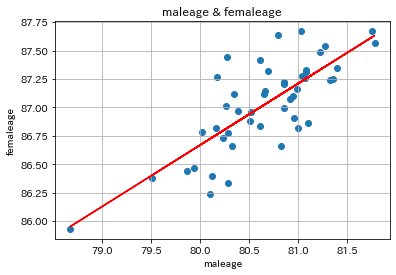

coefficient =  -0.20713092281679316
intercept =  92.28874111862717
R^2 =  0.02599141021218332


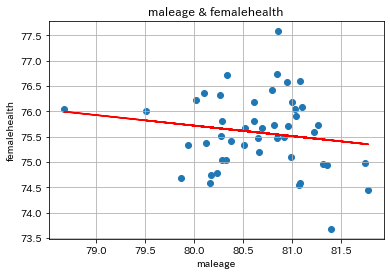

coefficient =  -1.2471490000211471
intercept =  165.69160333893961
R^2 =  0.11089728092251572


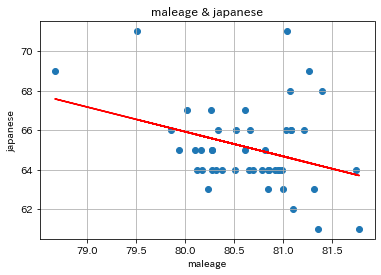

coefficient =  0.15811988169671926
intercept =  57.26857171162407
R^2 =  0.0028323996462821244


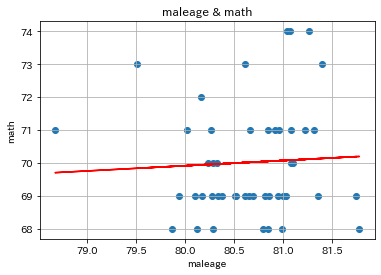

coefficient =  28.932569745839366
intercept =  -2025.2945852567232
R^2 =  0.2768344822678944


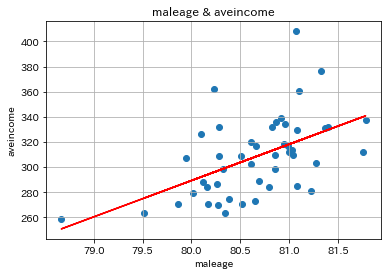

coefficient =  -0.013889476373293966
intercept =  2.5751094386048248
R^2 =  0.003242536611859248


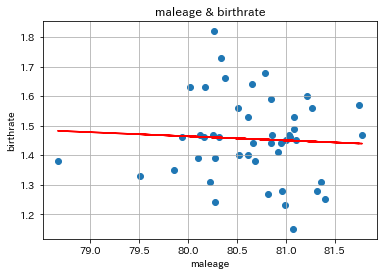

coefficient =  3.265693161718622
intercept =  -208.81488900997218
R^2 =  0.16226778719840573


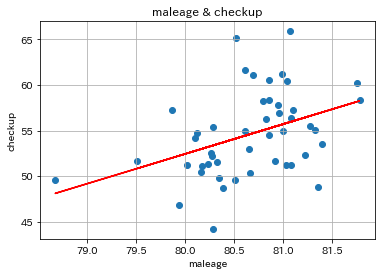

coefficient =  0.17310693767544838
intercept =  74.4479711881999
R^2 =  0.06545020065539786


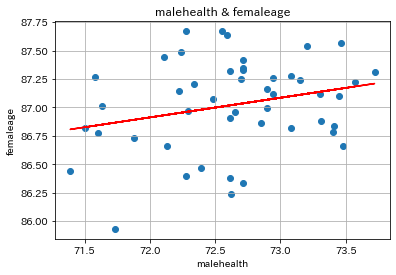

coefficient =  0.4425285075843881
intercept =  43.438768093446285
R^2 =  0.12729871569811646


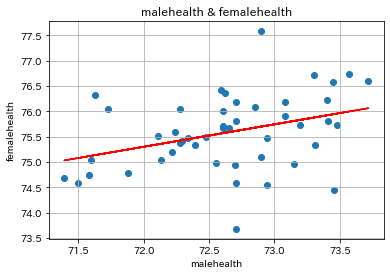

coefficient =  -0.21334005564580868
intercept =  80.60299609732414
R^2 =  0.0034820144796479102


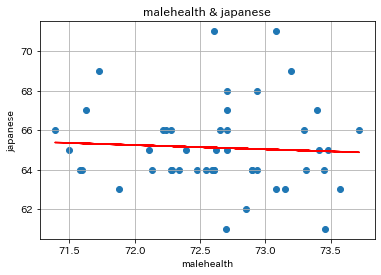

coefficient =  0.03729431072436793
intercept =  67.31228927936415
R^2 =  0.00016907067724236668


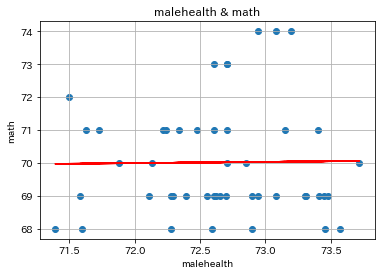

coefficient =  15.434683605234216
intercept =  -812.9671379028416
R^2 =  0.08453628960238335


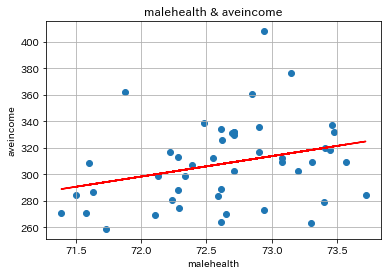

coefficient =  0.0039518223898651035
intercept =  1.1678408059409453
R^2 =  0.00028164985320433544


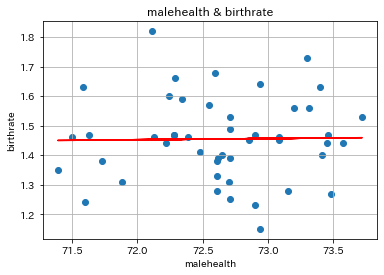

coefficient =  3.096548175535344
intercept =  -170.3571171445938
R^2 =  0.15654485360577652


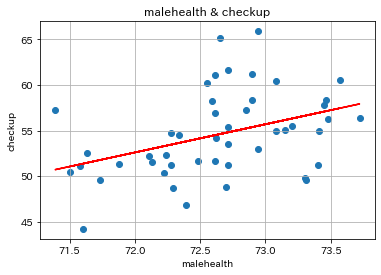

coefficient =  -0.18154754486892977
intercept =  91.38184511522803
R^2 =  0.009809350240678638


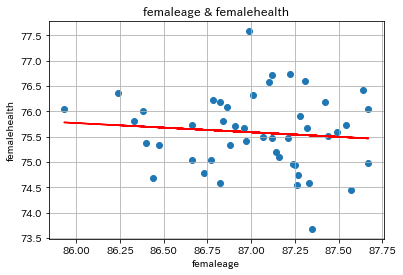

coefficient =  -0.6097609331559771
intercept =  118.16907674564409
R^2 =  0.0130233562796771


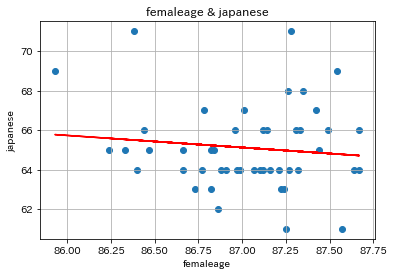

coefficient =  0.44033411806291145
intercept =  31.70246476080787
R^2 =  0.010791101093198363


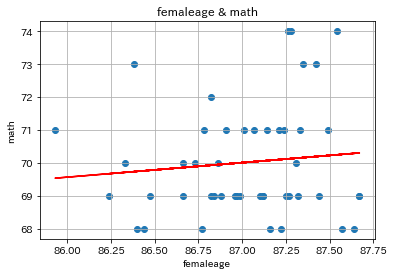

coefficient =  9.519481534686268
intercept =  -520.2268139601747
R^2 =  0.014722863174039369


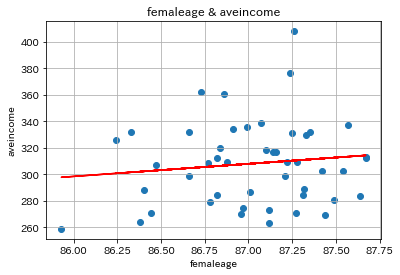

coefficient =  0.11249861218423003
intercept =  -8.334974973999747
R^2 =  0.10450257430366394


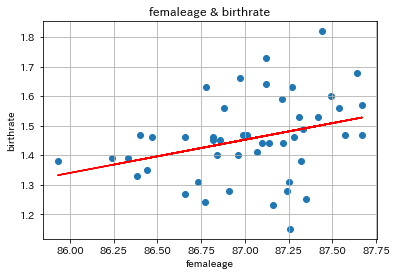

coefficient =  3.4771469226743026
intercept =  -248.01851063010216
R^2 =  0.09037476081065077


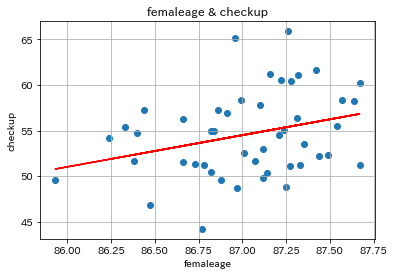

coefficient =  0.2885795496692325
intercept =  43.294619616160034
R^2 =  0.009801111987029598


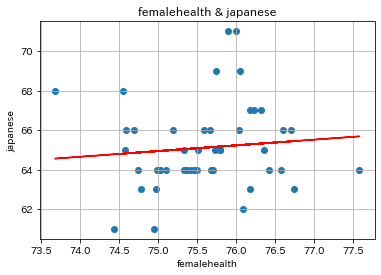

coefficient =  -0.3214288122677699
intercept =  94.31589206357764
R^2 =  0.019320182013546572


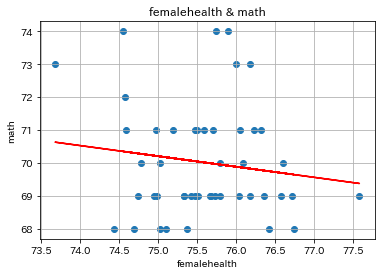

coefficient =  -10.242763384156827
intercept =  1082.3594696492034
R^2 =  0.05727175402547835


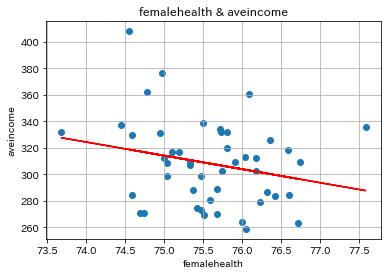

coefficient =  0.05885126204557259
intercept =  -2.9932725915598417
R^2 =  0.09609144836245376


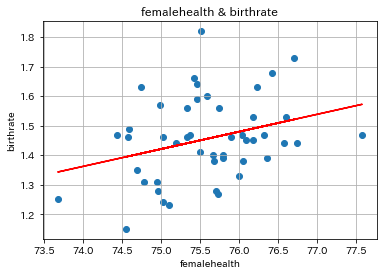

coefficient =  1.0051284299114576
intercept =  -21.40060182344174
R^2 =  0.025373753175988667


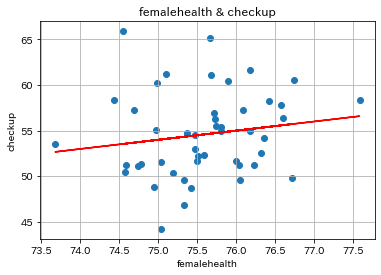

coefficient =  0.5590277777777777
intercept =  33.62500000000001
R^2 =  0.49655131270141484


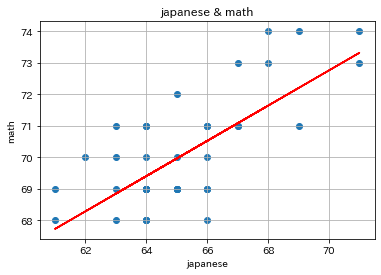

coefficient =  -4.171220238095238
intercept =  579.7517857142857
R^2 =  0.080702724527971


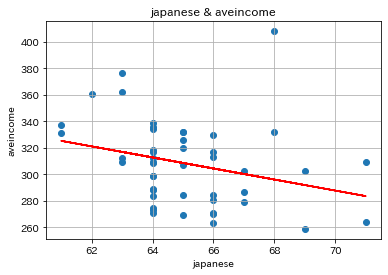

coefficient =  -0.002072420634920634
intercept =  1.5898214285714285
R^2 =  0.0010124760184540005


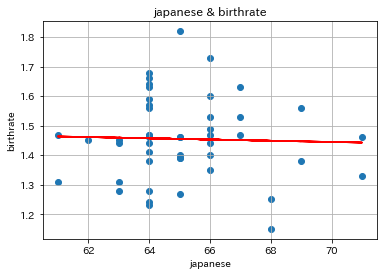

coefficient =  0.12192460317460344
intercept =  46.63214285714284
R^2 =  0.0031723423539531392


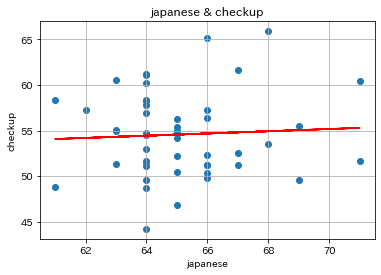

coefficient =  3.55997793190416
intercept =  58.90452395964701
R^2 =  0.036996378052092105


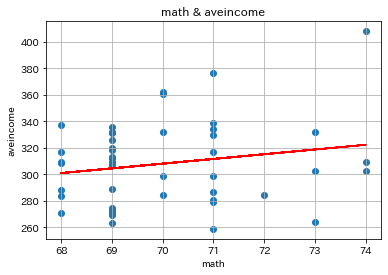

coefficient =  -0.013075346784363175
intercept =  2.3704460907944513
R^2 =  0.02536518322901926


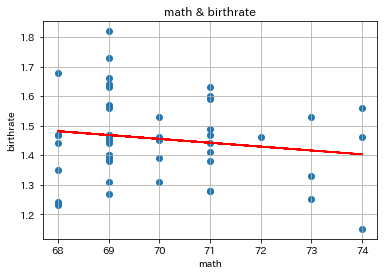

coefficient =  0.26915195460277463
intercept =  35.72384930643125
R^2 =  0.00972960179638771


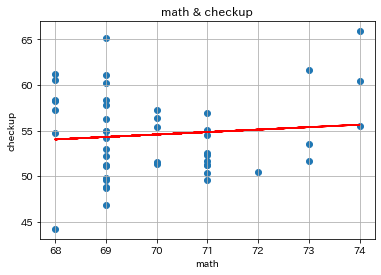

coefficient =  -0.0026293229910770988
intercept =  2.265195019828875
R^2 =  0.3513620502323296


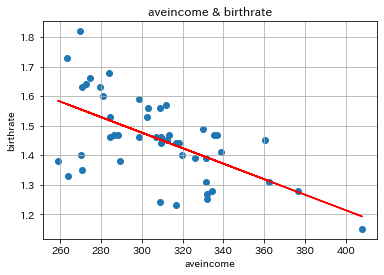

coefficient =  0.0388164123743371
intercept =  42.60782035330109
R^2 =  0.06932121709635075


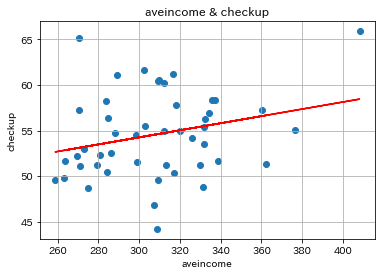

coefficient =  -6.890882472625905
intercept =  64.59571369102466
R^2 =  0.04298511610815092


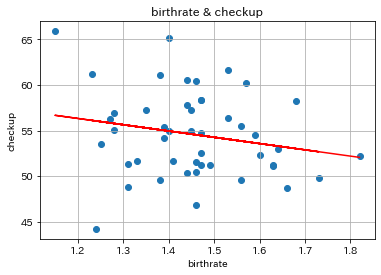

In [17]:
#全ての散布図に回帰直線を描く
index_list = df_prefecture.columns.tolist()
for i in range(len(index_list)):
  if index_list[i] in ['precode', 'prename']:
    continue
  for j in range(i+1, len(index_list)):
    plt.title(index_list[i] + ' & ' + index_list[j])
    plt.xlabel(index_list[i])
    plt.ylabel(index_list[j])
    plt.scatter(df_prefecture[index_list[i]], df_prefecture[index_list[j]])
    lr = LinearRegression() #線形モデル作成
    lr.fit(df_prefecture[[index_list[i]]].values, df_prefecture[index_list[j]].values) #学習
    print('coefficient = ', lr.coef_[0]) # 説明変数の係数
    print('intercept = ', lr.intercept_) # 切片
    print('R^2 = ', lr.score(df_prefecture[[index_list[i]]].values, df_prefecture[index_list[j]].values)) # 決定係数
    plt.plot(df_prefecture[[index_list[i]]].values, lr.predict(df_prefecture[[index_list[i]]].values), color = 'red')
    plt.grid()
    plt.show()

In [18]:
c = np.array([-2, -3])
A = np.array([[2, 1], [3, 6], [-1, 0], [0, -1]])
b = np.array([100, 240, 0, 0])
res = linprog(c, A_ub=A, b_ub=b, options={"disp": True})
print(res['x'])

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 -5.0                
0.03050011289233    0.03050011289233    0.03050011289239    0.9697104672667  0.03050011289233    -71.93808045697     
0.002792338711531   0.002792338711534   0.00279233871154    0.9467233884814  0.002792338711539   -134.6632433178     
2.401457127236e-06  2.401457127221e-06  2.401457127377e-06  0.9991963257798  2.401457127214e-06  -139.9947060547     
1.200762867764e-10  1.20075567457e-10   1.200755050945e-10  0.9999499988791  1.200740805901e-10  -139.9999997353     
Optimization terminated successfully.
         Current function value: -140.000000 
         Iterations: 4
[39.99999994 19.99999995]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [19]:
def rosenbrock(x):
    value = 0
    for i in range(len(x)-1):
        value += 100 * (x[i+1] - x[i])**2 + (1 - x[i])**2.0
    return value

In [20]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2]) #5変数で実施する。今回の初期値
res = minimize(rosenbrock, #目的関数
               x0, #初期値 
               method='nelder-mead', #最適化手法(今回は'Nelder-Mead')
               options={'xatol': 1e-8, #収束判定値(Nelder-Mead法)
                        'disp': True, #結果表示
                        'maxiter': 500 #繰り返し回数
                       })
print(res['x'])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 456
         Function evaluations: 735
[1. 1. 1. 1. 1.]


In [21]:
#線形回帰演習
df_demand = pd.read_csv('/content/drive/MyDrive/授業/2022データ解析講座(浜松)/ProgPrefecture2022/data/demand_prediction.csv')
df_demand

,holiday,rain,temperature,demand
0,1,0,30.6,644
1,1,0,32.5,728
2,0,0,30.9,586
3,0,0,24.5,492
4,0,1,26.7,440
5,0,0,33.7,620
6,0,0,33.2,596
7,1,0,33.6,638
8,1,1,25.2,498
9,0,1,30.7,547


In [28]:
lr = LinearRegression() #線形モデル作成
lr.fit(df_demand[['holiday','rain','temperature']].values, df_demand['demand'].values)
print('coefficient = ', lr.coef_) # 説明変数の係数
print('intercept = ', lr.intercept_) # 切片
print('R^2 = ', lr.score(df_demand[['holiday','rain','temperature']].values, df_demand['demand'].values)) # 決定係数

coefficient =  [ 70.53600782 -56.90919434  14.16434034]
intercept =  143.87194505309253
R^2 =  0.92210178918205


array([647.83676734, 674.74901399, 581.55006163, 490.89828344,
       465.15063785, 621.21021458, 614.12804441, 690.32978837,
       514.44013516, 521.80799922, 433.9890891 , 638.20742299,
       629.70881879, 659.45393351, 559.76602425, 704.49412871,
       469.39993995, 563.13641918, 675.03470788, 568.80215532,
       632.54168686, 564.01532635, 531.43734357, 633.95812089,
       618.37734652, 465.15063785, 433.9890891 , 625.45951669,
       532.8537776 , 703.07769467, 607.04587424])

In [31]:
#RMSE
from sklearn.metrics import mean_squared_error
demand_pred = lr.predict(df_demand[['holiday','rain','temperature']].values)
np.sqrt(mean_squared_error(df_demand['demand'], demand_pred))

22.913891508886085

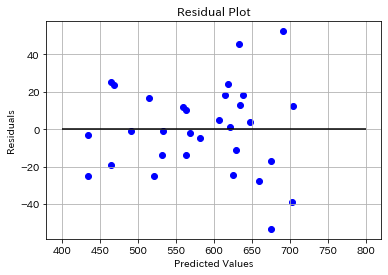

In [33]:
#残差プロット
plt.scatter(demand_pred, demand_pred - df_demand['demand'], color = 'blue')      # 残差をプロット 
plt.hlines(y = 0, xmin = 400, xmax = 800, color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

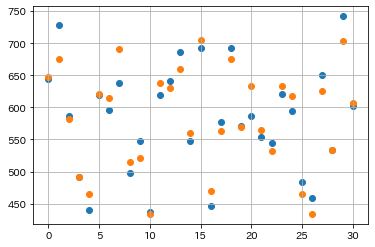

In [39]:
#散布図
x = [i for i in range(len(df_demand['demand']))]
plt.scatter(x, df_demand['demand'])
plt.scatter(x, demand_pred)
plt.grid()

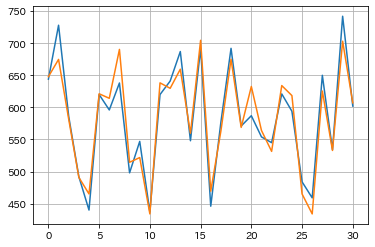

In [41]:
#折線
x = [i for i in range(len(df_demand['demand']))]
plt.plot(x, df_demand['demand'])
plt.plot(x, demand_pred)
plt.grid()